# Work in progress
# Pytorch
Na předchozích workshopech (resp. ve vedlejších noteboocích, pokud toto čtete na Githubu) jsme se věnovali základním technikám a algoritmům strojového učení. Jejich výhody spočívaly v nepříliš velkých hardwarových nárocích a vcelku solidním výkonu na tabulkoidních datech. Nezmínili jsme tehdy ale neuronové sítě a deep learning. V povídání o zpracování textu jsme se o tyto termíny už trochu otřeli, nicméně na danou problematiku se pořádně podíváme až nyní.  
Technicky vzato jsou neuronové sítě jen podmnožinou strojového učení. Fakticky se ale jedná o velice důležitou podmnožinu, která s přehledem dokázala vyřešit problémy, na které klasické postupy nestačily - zmiňme třeba klasifikaci objektů na obrázcích či složitější práci s textem. Daní za tento výkon je větší složitost problematiky a hlavně větší doba trénování a hardwarové nároky.  
V současné době jsou v pythonu etablovány dva frameworky spojené s neuronovými sítěmi - TensorFlow (i s nadstavbou Keras) a PyTorch. Sice mezi nimi existují určité technické rozdíly, ty ale nicméně nejsou pro naše dnešní úvodní povídání zase až tak podstatné a navíc se v průběhu času postupně stírají. Když se podíváte na můj GitHub, uvidíte pár věcí založených na TensorFlowu a koneckonců nultou iteraci tohoto workshopu jsem ukazoval též na něm. Proč tedy v nadpisu vidíte PyTorch? Inu, důvod je dosti přizemní - Tensorflow 2.X není kompatibilní s grafickou kartou na mém notebooku, tudíž by i příprava ukázkových příkladů trvala příliš dlouho. No a ukazovat Vám příklady pro starou verzi Tensorflowu mi nepřijde jako úplně dobrý nápad, když byste ho stejně nepoužívali. 

## Obsah  
[Manipulace s tenzory](#Manipulace-s-tenzory)  
[Příprava dat - tabulky](#Příprava-dat-tabulky)  
[....Použití Pytorche](#Použití-Pytorche)  
[....Použití scikit-learnu](#Použití-scikit-learnu)  
[Výroba jednoduché neuronové sítě](#Výroba-jednoduché-neuronové-sítě)  
[....Aktivační funkce](#Aktivační-funkce)  
[........Sigmoid](#Sigmoid)  
[........Softmax](#Softmax)  
[........Tanh](#Tanh)  
[........ReLU](#ReLU)  
[....Ztrátová funkce](#Ztrátová-funkce)  
[........Mean squared error (MSE)](#Mean-squared-error-(MSE))  
[........Cross-entropy loss](#Cross-entropy-loss)  
[....Backpropagace](#Backpropagace)  
[....Optimizéty](#Optimizéry)  
[....Dense síť v Pytorchi](#Dense-síť-v-Pytorchi)  
[....Minibatch](#Minibatch)  
[....Dense síť a obrázky](#Dense-síť-a-obrázky)  
[Konvoluční sítě](#Konvoluční-sítě)  
[....Maxpooling](#Maxpooling)  
[....Dropout](#Dropout)  
[....Batch normalization](#Batch-normalization)  
[Předtrénované neuronové sítě pro práci s obrázky](#Předtrénované-neuronové-sítě-pro-práci-s-obrázky)  
[....ImageNet](#ImageNet)  
[....Příprava obrázku](#Příprava-obrázku)  
[....AlexNet](#AlexNet)  
[....VGGNet](#VGGNet)  
[....Inception/GoogLeNet](#Inception/GoogLeNet)  
[....ResNet](#ResNet)  
[Transfer learning](#Transfer-learning)

## Manipulace s tenzory  
Stejně jako balíček Pandas přináší dataframe (a sérii), na kterém poté staví celou svou činnost, nese s sebou Pytorch tenzor. Co to vlastně tenzor je? Tento termín se vyskytuje i mimo Pytorch a označuje se jím (matematici pominou zjednodušení) zobecnění skalárů, vektrorů a matic do vyšších dimenzí. Člověk by si mohl myslet, že stejnou funkčnost zastanou stávající pythoní objekty a není třeba vymýšlet něco nového. Bohužel je ale situace komplikovanější. V Pythonu je totiž každá věc včetně integerů či floatů objekt. To znamená, že tyto konstrukce obsahují krom číslené informace i něco navíc. Tohle "něco" sice přináší dodatečnou funkčnost, ale také to zabírá víc paměti. U pár čísel to nevadí, jenomže při práci s neuronovými sítěmi s pouhými několika čísly pracovat nebudeme. No a výhodou tenzoru je to, že čísla v něm obsažená jsou opravdu jen čísla bez čehokoli dalšího. Jinak pytorchí tenzory mohou obsahovat pouze čísla (pokud booleany budeme brát také za čísla), nikoli ale textové řetězce.  
Jelikož jsou tenzory základním stavebním kamenem Pytorche, měli bychom se s nimi naučit pracovat, než budeme dělat cokoli komplikovanějšího.  

Z historických důvodů se importovaný balíček nejmenuje pytorch, nýbrž torch.

In [1]:
import torch
import torchvision
import pathlib
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os
import pandas as pd
from matplotlib.image import imread
import matplotlib.pyplot as plt
import math

Asi nejpřímočařejší je vytvoření 1D tenzorů obsahující pouze jedničky či nuly. Parametr funkcí *ones* a *zeros* udává počet těchto čísel.

In [5]:
tensor_of_ones = torch.ones(5)
print("Tensor of ones:")
print(tensor_of_ones)

tensor_of_zeros = torch.zeros(7)
print ("Tensor of zeros:")
print(tensor_of_zeros)

Tensor of ones:
tensor([1., 1., 1., 1., 1.])
Tensor of zeros:
tensor([0., 0., 0., 0., 0., 0., 0.])


Lze vytvořit i tenzor obsahující náhodná čísla:

In [3]:
torch.rand(5)

tensor([0.2395, 0.2264, 0.5841, 0.7670, 0.4245])

K elementům tenzoru můžeme přistupovat "normálně", tj přes index. Za pozornost asi stojí zmínka, že i když chceme jen jeden element tenzoru, nevrátí se nám číslo, ale tenzor.

In [6]:
tensor_of_ones[0]

tensor(1.)

Pokud opravdu potřebujeme číslo, musíme použít metodu *item*.

In [7]:
tensor_of_ones[0].item()

1.0

Tenzory nejsou immutable, nýbrž se čísla v nich dají měnit:

In [4]:
tensor_of_ones[-1] = 999
tensor_of_ones

tensor([  1.,   1.,   1.,   1., 999.])

Pokud chceme mít tenzor jedniček/nul o více rozměrech, napíšeme zkrátka do funkce více parametrů.

In [5]:
torch.zeros(2,3)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [6]:
torch.zeros(2,3, 4)

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

Obecný tenzor se dá vyrobit například pomocí listu

In [7]:
tensor_of_numbers = torch.tensor([1,2,3,4,5,6])
tensor_of_numbers

tensor([1, 2, 3, 4, 5, 6])

Takto lze vytvořit i vícedimenzionální tenzory - v listu musí být podlisty

In [8]:
tensor_more_dims = torch.tensor([
    [1, 2],
    [3, 4],
    [5, 6]
])
tensor_more_dims

tensor([[1, 2],
        [3, 4],
        [5, 6]])

Upozorněme, že nelze vytvořit "pilovitý tenzor", tj. něco v duchu
```python
tensor_bad = torch.tensor([
    [1, 2],
    [3],
    [5, 6]
])
```
Tvar (velikost tenzoru v jednotlivých dimenzích) se získá pomocí atributu shape

In [9]:
print(f"Shape of 1D tensor: {tensor_of_numbers.shape}")
print(f"Shape of 2D tensor: {tensor_more_dims.shape}")

Shape of 1D tensor: torch.Size([6])
Shape of 2D tensor: torch.Size([3, 2])


Když hovoříme o dimenzích, asi bychom měli zmínit funkce squeeze a unsqueeze. Squeeze z tenzoru odstraní všechny dimenze o velikosti 1.

In [10]:
tensor_before_squeeze = torch.ones(2,1)
print("Tensor before squeze:")
print(tensor_before_squeeze)
print(f"Shape of tensor before squeeze: {tensor_before_squeeze.shape}\n")

tensor_after_squeeze = tensor_before_squeeze.squeeze()
print("Tensor after squeeze:")
print(tensor_after_squeeze)
print(f"Shape of tensor after squeeze: {tensor_after_squeeze.shape}\n")

Tensor before squeze:
tensor([[1.],
        [1.]])
Shape of tensor before squeeze: torch.Size([2, 1])

Tensor after squeeze:
tensor([1., 1.])
Shape of tensor after squeeze: torch.Size([2])



Unsqueeze naopak na místo určené uživatelem dimenzi o velikosti jedna přidá. Typické užití je v převedení jednoho tenzoru do stejného rozměru, jako má tenzor jiný, aby se s oběma součaasně dalo pracovat.

In [11]:
tensor_before_unsqueeze = torch.ones(2,2)
print("Tensor before unsqueze:")
print(tensor_before_unsqueeze)
print(f"Shape of tensor before unsqueeze: {tensor_before_unsqueeze.shape}\n")

tensor_after_unsqueeze = tensor_before_unsqueeze.unsqueeze(1)
print("Tensor after unsqueeze:")
print(tensor_after_unsqueeze)
print(f"Shape of tensor after unsqueeze: {tensor_after_unsqueeze.shape}\n")

Tensor before unsqueze:
tensor([[1., 1.],
        [1., 1.]])
Shape of tensor before unsqueeze: torch.Size([2, 2])

Tensor after unsqueeze:
tensor([[[1., 1.]],

        [[1., 1.]]])
Shape of tensor after unsqueeze: torch.Size([2, 1, 2])



Výše jsme si ukázali, jak se dostat k číslu v 1D tenzoru. U vícedimenzionálních tenzorů přistupujeme k jednotlivým číslům pomocí n indexů, kde n je počet dimenzí.

In [12]:
tensor_more_dims[1,0]

tensor(3)

Případně můžeme vzít celý řádek

In [13]:
row = tensor_more_dims[1]
row

tensor([3, 4])

Či sloupec

In [14]:
column = tensor_more_dims[:,1]
column

tensor([2, 4, 6])

Bacha ale, takhle se nevyrání nové tenzory, pouze se na původní data koukáme jiným způsobem.

In [15]:
column[0] = 20
tensor_more_dims

tensor([[ 1, 20],
        [ 3,  4],
        [ 5,  6]])

Fakticky to funguje tak, že jsou data v tzv storagi - vždy jednorozměrném poli. Tenzory jsou pak jenom pohledem na toto pole. Narozdíl od tenzoru nemá storage parametr shape.

In [16]:
tensor_more_dims.storage()

 1
 20
 3
 4
 5
 6
[torch.LongStorage of size 6]

Funkce storage_offset() vrací index, od kterého ve storagi začíná první prvek příslušného tenzoru.

In [17]:
tensor_more_dims.storage_offset()

0

In [18]:
column.storage_offset()

1

In [19]:
row.storage_offset()

2

Stride zase říká, kolik prvků se musí ve storagi přeskočit, když se v tenzoru přesuneme o jednu pozici. Výsledný tuple ukazuje stride pro každou dimenzi.

In [20]:
tensor_more_dims.stride()

(2, 1)

In [21]:
column.stride()

(2,)

In [22]:
row.stride()

(1,)

Proč vůbec o těchto věcech mluvíme? Díky nim jsou mnohé operace s tenzory výpočetně nenáročné - nedochází totiž k přeuspořádání dat, pouze se změní několik málo metadat. Příkladem takovéto operace může být transpozice, tj. prohození sloupců a řádků. Realizujeme ji pomocí metody *t*.

In [23]:
original_tensor = torch.tensor([
    [1, 2],
    [3, 4],
    [5, 6],
])
print("Original tensor")
print(original_tensor)
print(f"Original tensor metadata -  offset: {original_tensor.storage_offset()}, stride: {original_tensor.stride()}\n")
print("Transponed tensor")
transponed_tensor = original_tensor.t()
print(transponed_tensor)
print(f"Transponed tensor metadata -  offset: {transponed_tensor.storage_offset()}, stride: {transponed_tensor.stride()}\n")

Original tensor
tensor([[1, 2],
        [3, 4],
        [5, 6]])
Original tensor metadata -  offset: 0, stride: (2, 1)

Transponed tensor
tensor([[1, 3, 5],
        [2, 4, 6]])
Transponed tensor metadata -  offset: 0, stride: (1, 2)



Transpozici lze realizovat i na tenzorech o vyšších dimenzích. Tehdy se musí použít funkce *transpose*, která přebírá dva parametry - indexy prohazovaných os. Tj. pro 2D tenzory je metodě *t* ekvivaletní *transpose(0,1)*.

In [24]:
many_dim_tensor = torch.zeros(2,3,4)
print(many_dim_tensor.shape)
transponed_many_dim_tensor = many_dim_tensor.transpose(1,2)
print(transponed_many_dim_tensor.shape)

torch.Size([2, 3, 4])
torch.Size([2, 4, 3])


Existuje ale ještě jedna, asi dokonce častěji používaná funkcionalita - pohledy. O co se jedná? Dalo by se říci, že pohled se má k tenzoru jako tenzor ke storagi. Jinými slovy jedná se o způsob, jak přespořádat elementy tenzoru. Z hlediska technického je view metoda tenzoru, která přebírá n argumentů. Ty popořadě specifikují velikost dimenze, jejíž index odpovídá pořadí argumentu. Pokud člověk na nějaké místo (nejen na konec, jako v příkladu, ale i kamkoli jinam) napíše mínus jedničku, dopočítá se velikost dimenze z ostatních dimenzí a počtu dat v původním tenzoru.

In [25]:
normal_tensor = torch.tensor([
    [1,2,3,4,5,6],
    [7,8,9,10,11,12]
])

first_view = normal_tensor.view(3,4)
second_view = normal_tensor.view(2,3,-1)

print("Original tensor:")
print(normal_tensor)
print("First tensor:")
print(first_view)
print("Second tensor:")
print(second_view)

Original tensor:
tensor([[ 1,  2,  3,  4,  5,  6],
        [ 7,  8,  9, 10, 11, 12]])
First tensor:
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])
Second tensor:
tensor([[[ 1,  2],
         [ 3,  4],
         [ 5,  6]],

        [[ 7,  8],
         [ 9, 10],
         [11, 12]]])


Tenzor je objekt obsahující čísla, vyvstává tak otázka, jak s tenzory (ve správných dimenzích maticemi či vektory) vlastně počítat.

In [19]:
first_tensor = torch.Tensor([
    [1,1,1],
    [2,2,2],
    [3,3,3]
])
second_tensor = torch.Tensor([
    [10,1,0],
    [0,10,1],
    [-1,-1,-1]
])

Přičítání/odečítání/násobení/dělení tenzoru číslem je přímočaré:

In [13]:
first_tensor/3

tensor([[0.3333, 0.3333, 0.3333],
        [0.6667, 0.6667, 0.6667],
        [1.0000, 1.0000, 1.0000]])

Sčítání a odčítání tenzorů mezi sebou také (jen tedy tenzory musí mít stejný tvar).

In [20]:
first_tensor-second_tensor

tensor([[-9.,  0.,  1.],
        [ 2., -8.,  1.],
        [ 4.,  4.,  4.]])

Násobení tenzorů po elementech (myšleno, že dejme tomu ve  2D bude ij-tý element výsledku roven ij-tému elementu prvního tenzoru a ij-tému elementu druhého tenzoru) realizujeme hvězdičkou...

In [8]:
first_tensor*second_tensor

tensor([[10.,  1.,  0.],
        [ 0., 20.,  2.],
        [-3., -3., -3.]])

... či metodou *mul*.

In [9]:
first_tensor.mul(second_tensor)

tensor([[10.,  1.,  0.],
        [ 0., 20.,  2.],
        [-3., -3., -3.]])

Klasické maticové násobení provedeme zavináčem...

In [10]:
first_tensor@second_tensor

tensor([[ 9., 10.,  0.],
        [18., 20.,  0.],
        [27., 30.,  0.]])

... či metodou *matmul*.

In [11]:
first_tensor.matmul(second_tensor)

tensor([[ 9., 10.,  0.],
        [18., 20.,  0.],
        [27., 30.,  0.]])

Někdy potřebujeme udělat kopii tenzoru, která nebude s originálem sdílet data ve storagi. Tehdy musíme použít metodu *clone*.

In [26]:
cloned_tensor = original_tensor.clone()
cloned_tensor[0,0] = 50
print("Original tensor")
print(original_tensor)
print("Cloned tensor")
print(cloned_tensor)

Original tensor
tensor([[1, 2],
        [3, 4],
        [5, 6]])
Cloned tensor
tensor([[50,  2],
        [ 3,  4],
        [ 5,  6]])


Pro porovnání elementů v tenzoru s určitou hodnotou můžeme použít následující funkce:
- lt (neboli lower than)
- le (neboli lower than or equal)
- eq (neboli equal)
- ge (neboli greater than or equal)
- gt (neboli greather than) 

Jejich samostatné použití vyústí v tenzor booleanů:

In [27]:
comparison_tensor = torch.tensor([
    [1,2,3],
    [4,5,6],
    [7,8,9],
    [10,11,12]
])
print("Original tensor")
print(comparison_tensor)
print("Tensor of comparison validity:")
print(comparison_tensor.eq(5))

Original tensor
tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])
Tensor of comparison validity:
tensor([[False, False, False],
        [False,  True, False],
        [False, False, False],
        [False, False, False]])


Pro zjištění hodnot podmínku splňující musíme podobně jako v pandách použít hranaté závorky.

In [28]:
comparison_tensor[comparison_tensor.ge(5)]

tensor([ 5,  6,  7,  8,  9, 10, 11, 12])

Pokud chceme v jeden okamžik použít více podmínek, musíme je svázat pomocí & (má význam *and*) či | (má význam *or*)

In [29]:
comparison_tensor[comparison_tensor.lt(3) | comparison_tensor.gt(10)]

tensor([ 1,  2, 11, 12])

In [30]:
comparison_tensor[comparison_tensor.gt(3) & comparison_tensor.lt(10)]

tensor([4, 5, 6, 7, 8, 9])

Další pro obálkoidní objekty (listy, dataframy) typickou úlohou je nalepování jeden na druhý. To se v Pytorchi realizuje funkcí *cat*. Jejím prvním parametrem je tuple či list s na sebe nalepovanými tenzory, druhý parametr - *dim* - pak říká, přes jakou osu/dimezi se na sebe tenzory vlastě mají lepit. Platí přitom, že ostatní dimeze tenzorů by měly mít stejný rozměr.

In [31]:
first_tensor = torch.tensor([
    [1,2,3,4],
    [5,6,7,8]
])
second_tensor = torch.tensor([
    [9,10,11,12]
])
concatenated_tensor = torch.cat((first_tensor, second_tensor), dim=0)
concatenated_tensor

tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])

Jakých datových typů vlastně mohou hodnoty v tenzoru nabývat? Máme k dispozici několikero typů floatů a integerů + booleany:
- torch.bool  
- torch.float16 (alias torch.half)
- torch.float32 (alias torch.float) - jedná se o default
- torch.float64 (alias torch.double)
- torch.int8
- torch.uint8
- torch.int16 (alias torch.short)
- torch.int32 (alias torch.int)
- torch.int64 (alias torch.long)  - jedná se default při vložení celých čísel do kontruktoru
  
Datový typ můžeme nastavit při vytvoření tenzoru s pomocí parametru dtype:

In [32]:
tensor_integers = torch.tensor([1,2,3,4], dtype=torch.int32)
tensor_integers

tensor([1, 2, 3, 4], dtype=torch.int32)

In [33]:
tensor_floats = torch.tensor([1,2,3,4], dtype=torch.float32)
tensor_floats

tensor([1., 2., 3., 4.])

Pro konverzi již existujících tensorů lze použít metody *to* či *type*. Pro jistotu zdůrazněme, že původní tenzor si zachovává svůj datový typ.

In [34]:
tensor_float64 = tensor_integers.to(dtype=torch.double)
tensor_float64

tensor([1., 2., 3., 4.], dtype=torch.float64)

In [35]:
tensor_int16 = tensor_floats.type(torch.short)
tensor_int16

tensor([1, 2, 3, 4], dtype=torch.int16)

S pytorchími tenzory a numpoidními poli se pracuje dosti podobně a tak není moc překvapivé, že jedny můžeme konvertovat na druhé. Přeměna tezoru na numpy array se provede pomocí metody *numpy*.

In [36]:
some_tensor = torch.tensor([1,2,3,4])
some_numpy_array = some_tensor.numpy()
some_numpy_array

array([1, 2, 3, 4], dtype=int64)

Opačný proces se realizuje funkcí *from_numpy*.

In [37]:
tensor_from_numpy = torch.from_numpy(some_numpy_array)
print(tensor_from_numpy)
print(tensor_from_numpy.dtype)

tensor([1, 2, 3, 4])
torch.int64


V kontextu deep learningu je významný přesun tenzorů z CPU na GPU. Proč vlastně GPU vůbec řešíme? Jeden výpočetní element (jádro) na CPU je silnější než jeden výpočetní element na GPU. Jenomže zatímco jader na CPU máme pár jednotek, na GPU je jich řádově mnohem více. No a vzhledem k tomu, že výpočty spojené s neuronovými sitěmi se dají dobře paralelizovat, trvají operace s použitím GPU mnohem kratší dobu.  
Každopádně abychom něco s GPU mohli dělat, musíme si ověřit, že ji Pytorch vůbec vidí:

In [2]:
torch.cuda.is_available()

True

Aby nějaký výpočet na GPU mohl probíhat, musíme tam nejprve dostat vstupní data. Jedním ze způsobů, jak toho docílit, je stanovit už v konstruktoru tenzoru, že mají operace probíhat na *device="cuda"*. CUDA (Compute Unified Device Architecture) je platforma pro paralelní výpočty nad grafickými kartami Nvidie. Pozn.: nula v outputu buňky níže označuje index grafické karty.

In [38]:
tensor_gpu = torch.tensor([1,2,3,4], device="cuda")
tensor_gpu

tensor([1, 2, 3, 4], device='cuda:0')

Už vytvořené tenzory zkopírujeme na GPU pomocí metody *to*. Stejná metoda pak zase zkopíruje tenzor z GPU na CPU.

In [39]:
tensor_cpu = torch.tensor([1,2,3,4])
tensor_moved_to_gpu = tensor_cpu.to(device="cuda")
tesor_moved_to_cpu = tensor_moved_to_gpu.to(device="cpu")

print(tensor_cpu)
print(tensor_moved_to_gpu)
print(tesor_moved_to_cpu)

tensor([1, 2, 3, 4])
tensor([1, 2, 3, 4], device='cuda:0')
tensor([1, 2, 3, 4])


Zdůrazněme, že se tu opravdu jedná o kopírování, tj. změna v původním objektu nevyvolá změnu v objektu na novém působišti.

In [40]:
tensor_cpu[0] = 10
tensor_moved_to_gpu[1] = 20
tesor_moved_to_cpu[2] = 30

print(tensor_cpu)
print(tensor_moved_to_gpu)
print(tesor_moved_to_cpu)

tensor([10,  2,  3,  4])
tensor([ 1, 20,  3,  4], device='cuda:0')
tensor([ 1,  2, 30,  4])


Co dělat, když chceme tenzor uložit na disk? Nejpřímočařejší je využití funkce *save*, která fakticky objekt uloží ve formátu pickle.

In [41]:
saved_tensor = torch.tensor([1,2,3,4])
torch.save(saved_tensor, "saved_tensor.t")

Nahrát tenzor z disku můžeme pomocí funkce load.

In [42]:
loaded_tensor = torch.load("saved_tensor.t")
loaded_tensor

tensor([1, 2, 3, 4])

Možností pro ukládání je více - například lze použít formát HDF5. To zde ale ukazovat nebudeme.

## Příprava dat - tabulky

### Použití Pytorche
Předtím, než se pustíme do vytvoření té nejjednodušší neuronové sítě, si musíme připravit data. V rámci zažití pytorchích operací to zkusme napřed bez použití sklearnovkých utilit. Nicméně jak později uvidíme, s nimi se bude přeci jen pracovat efektivněji.  
Co se dat týče, použijme klasický dataset kosatců.

In [2]:
iris_data_heap = load_iris()
iris_dataframe = pd.DataFrame(iris_data_heap["data"], columns=iris_data_heap["feature_names"])
iris_dataframe["target"] = pd.Series(iris_data_heap["target"])
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Pytorch dovoluje konvertovat na tenzory numpoidní pole, nikoli dataframy, proto dodatečný převod.

In [3]:
iris_tensor = torch.tensor(iris_dataframe.to_numpy())
print(f"Shape of iris tensor: {iris_tensor.shape}")
iris_tensor[0:5,:]

Shape of iris tensor: torch.Size([150, 5])


tensor([[5.1000, 3.5000, 1.4000, 0.2000, 0.0000],
        [4.9000, 3.0000, 1.4000, 0.2000, 0.0000],
        [4.7000, 3.2000, 1.3000, 0.2000, 0.0000],
        [4.6000, 3.1000, 1.5000, 0.2000, 0.0000],
        [5.0000, 3.6000, 1.4000, 0.2000, 0.0000]], dtype=torch.float64)

Data rozděleme na trénovací a testovací. V Pytorchi na to lze použít funkci random_split, s tím se ale pojí použití několika dalších typů objektů. Na ty přijde řeč až později v textu, proto tady provedeme naivnější postup s pomocí funkce *randperm*. Ta jako parametr přebírá celé číslo n a vytvoří jednorozměrný tenzor s náhodně uspořádánými čísly 0 až n-1 (každé se vyskytuje právě jednou). Tato náhodně přeuspořádaná čísla nám poslouží jako indexy řádků nového tenzoru. Ten bude fakticky stejný jako původní, jen bude mít přeházené řádky. Tento nový tenzor rozdělíme v poměru 80%:20% s tím, že větší část bude sloužit k trénování modelu a menší k jeho testování.

In [4]:
total_length = iris_tensor.shape[0]
train_length = round(total_length*0.8)
iris_tensor_row_permutation = iris_tensor[torch.randperm(total_length),:]
iris_train = iris_tensor_row_permutation[:train_length,:]
iris_test = iris_tensor_row_permutation[train_length:,:]

Prediktory musí stát samostatně - vyrobme si tedy nové tenzory, kde sloupeček s targety není.

In [5]:
iris_train_predictors = iris_train[:,:-1]
iris_test_predictors = iris_test[:,:-1]

print(f"Shape of iris tensor without target: {iris_train_predictors.shape}")
iris_train_predictors[0:5,:]

Shape of iris tensor without target: torch.Size([120, 4])


tensor([[6.7000, 2.5000, 5.8000, 1.8000],
        [4.4000, 3.0000, 1.3000, 0.2000],
        [6.3000, 2.3000, 4.4000, 1.3000],
        [4.7000, 3.2000, 1.6000, 0.2000],
        [4.4000, 3.2000, 1.3000, 0.2000]], dtype=torch.float64)

Stejně tak si vyrobme i tenzor, kde budou pouze targety. Jelikož Pytorch si s takovýmto formátem targetu poradí (nemusíme provádět one-hot encodování), není třeba nic dalšího dělat. 

In [34]:
iris_train_target = iris_train[:,-1]
iris_test_target = iris_test[:,-1]

print(f"Shape of iris target tensor: {iris_train_target.shape}")
iris_train_target

Shape of iris target tensor: torch.Size([120])


tensor([0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 2., 0., 2., 2., 1., 1., 0.,
        2., 1., 0., 0., 0., 1., 0., 2., 1., 1., 2., 2., 2., 0., 1., 1., 1., 1.,
        2., 0., 2., 2., 0., 1., 1., 2., 2., 0., 2., 1., 0., 1., 0., 0., 0., 1.,
        2., 0., 0., 1., 1., 1., 0., 2., 2., 0., 1., 1., 1., 0., 2., 0., 1., 1.,
        2., 2., 2., 2., 2., 1., 1., 2., 0., 0., 1., 0., 1., 1., 0., 2., 1., 1.,
        1., 0., 2., 2., 1., 0., 1., 2., 0., 0., 2., 2., 0., 2., 2., 2., 0., 1.,
        0., 2., 2., 2., 1., 1., 1., 0., 2., 2., 0., 1.], dtype=torch.float64)

Z důvodu rychlosti či dokonce vůbec proveditelnosti konvergence trénování jsou neuronové sítě jedním z algoritmů, který vyžaduje nanormovaná data. Opět zkusíme provést normování bez použití utilit z sklearnu.

In [6]:
columns_mean = torch.mean(iris_train_predictors, dim=0)
print(f"Tensor with average value of every column: {columns_mean}")
columns_variance = torch.var(iris_train_predictors, dim=0)
print(f"Tensor with variance of every column: {columns_variance}")

iris_train_predictors_normalised = (iris_train_predictors-columns_mean)/torch.sqrt(columns_variance)
iris_test_predictors_normalised = (iris_test_predictors-columns_mean)/torch.sqrt(columns_variance)

iris_train_predictors_normalised[0:5,:]

Tensor with average value of every column: tensor([5.8258, 3.0517, 3.6767, 1.1525], dtype=torch.float64)
Tensor with variance of every column: tensor([0.7387, 0.1921, 3.2421, 0.5679], dtype=torch.float64)


tensor([[ 1.0171, -1.2587,  1.1792,  0.8592],
        [-1.6589, -0.1179, -1.3199, -1.2640],
        [ 0.5517, -1.7150,  0.4017,  0.1957],
        [-1.3099,  0.3384, -1.1533, -1.2640],
        [-1.6589,  0.3384, -1.3199, -1.2640]], dtype=torch.float64)

### Použití scikit-learnu

Nyní se pokusíme dosáhnout stejného vysledku s použitím scikit-learnu. No ale jelikož budeme dále používat objekty vyrobené právě s jeho pomocí, proběhne tu i rozdělení na trénovací a testovací data.

In [3]:
iris_data_heap = load_iris()
iris_dataframe = pd.DataFrame(iris_data_heap["data"], columns=iris_data_heap["feature_names"])
iris_dataframe["target"] = pd.Series(iris_data_heap["target"])

train_features, test_features, train_target, test_target = \
    train_test_split(iris_dataframe.drop("target", axis=1), iris_dataframe[["target"]], test_size=0.2, random_state=10)

In [4]:
target_train_tensor = torch.tensor(train_target.to_numpy(), dtype=torch.int64).squeeze()
target_test_tensor = torch.tensor(test_target.to_numpy(), dtype=torch.int64).squeeze()

target_train_tensor

tensor([1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1,
        1, 0, 0, 1, 0, 2, 0, 0, 2, 1, 2, 0, 2, 0, 1, 1, 0, 2, 2, 2, 2, 2, 0, 1,
        2, 1, 0, 2, 1, 1, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 2, 2, 1, 1, 2, 2, 2, 2,
        1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 2, 0, 1, 1, 2, 0, 2, 0,
        1, 1, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 2, 0, 0, 1, 0, 2, 2, 2, 1, 0, 2, 0])

Ani ke škálování se toho mnoho říci nedá:

In [5]:
scaler_standard = StandardScaler()

scaled_predictors_train = scaler_standard.fit_transform(train_features)
scaled_predictors_train_tensor = torch.tensor(scaled_predictors_train)

scaled_predictors_test = scaler_standard.transform(test_features)
scaled_predictors_test_tensor = torch.tensor(scaled_predictors_test)

scaled_predictors_train_tensor[0:5,:]

tensor([[ 0.8711, -0.3989,  0.4606,  0.1058],
        [ 0.3938, -0.3989,  0.2919,  0.1058],
        [ 1.5871, -0.1677,  1.1354,  0.4945],
        [-0.0835, -0.6302,  0.7418,  1.5309],
        [ 0.5131, -1.3239,  0.6855,  0.8831]], dtype=torch.float64)

## Výroba jednoduché neuronové sítě

Na úplném začátku si ujasněme, co vlastně jednoduchou (dense) sítí myslíme. Jedná se o strukturu složenou z neuronů, které jsou uspořádány do vrstev (viz obr. 1). Každý neuron v n-té vrstvě je spojen s každým neuronem v n-1 a n+1 vrstvě, s neurony ze své vlastní vrstvy ale žádné spojení nemá. První vrstva se nazývá vrstvou vstupní. Do každého neuronu zde umístěného se bez jakýchkoli dalších transformací dostávají data z jednoho z prediktorů. To tedy například znamená, že neuronová síť zpracovávající kosatcová data by měla mít 4 vstupní neurony. Podobně výstuní vrstva obsahuje to, co by měl model uživateli poskytnout. V případě regresních úloh či binárního klasifikátoru je na výstupu jeden neuron, u multiclass klasifikačních úloh by ale na výstupu měl být pro každou třídu alokován jeden neuron. Tyto neuronvy by totiž měly obsahovat pravděpodobnost, že ohodnocovaný záznam do příslušné třídy patří.   
![vrstvy](pytorch_images/layers.png)
<center>Obrázek 1: Uspořádání neuronů do vrstev.</center>  

V předchozím odstavci se pořád mluví o neuronech - jak ale tyto záhadné objekty fungují? Neuron přebírá informace - hodnoty z předešlé vrstvy. Nicméně tyto hodnoty jsou přenásobeny váhami $w_i$. Zdůrazněme, že jelikož váhy NEJSOU omezeny na interval [0,1], může se jejich působením přebíraná hodnota i zvětšovat. V obrázku č. 2 vidíme, že do neuronu míří i jakési *b*. Jedná se o bias neboli konstantu, která je pro každný neuron jiná. Dalo by se říci, je *b* je ekvivaletní $w_0$, přičemž hodnota, kterou tato váha upravuje, je vždy jednička. Když se to dá dohromady, má hodnota např. neuronu C z obrázku velikost $z = w_1A + w_2B + b_C$. Kdyby toto bylo vše, neměla by všam neuronová síť moc smysl. Jednalo by se totiž o řetěz lineárních operací, které by se daly přepsat do podoby jedné jediné lienární operace. Proto se na mezivýsledek označený písmenem *z* v rámci neuronu vypustí nějaká nelineární funkce (obvykle nazývaná aktivační funkce) a výstupem neuronu je tak  
$y = f_{akt}(z) = f_{akt}(w_1A + w_2B + b_C)$.  

![neuron](pytorch_images/one_neuron.png)
<center>Obrázek 2: Náčrt neuronu.</center>  

### Aktivační funkce
Aktivační funkce bývají pro jednu vrstvu stejné. Častokrát dokonce bývá aktivační funkce stejná pro celou síť - tedy s čestnou výjimkou výstupní vrstvy. Tam bývá buďto funkce, která hodnoty neuronu převádí do intervalu [0,1] (klasifikační úlohy), anebo aktivační funkce absentuje (regresní úlohy). A jaké funkce se vlastně používají?

#### Sigmoid
Funkce sigmoid definovaná jako  
$f(x) = \frac{1}{1+exp(-x)}$  
bere jako vstup čísla v intervalu [-inf, +inf], aby vyprodukovala výstup z intervalu [0,1]. Díky tomu může být použita jako aktivační funkce pro výstupní vrstvu u binárního klasifikačního problému, kde se její produkt dá interpretovat jako pravděpodobnost. Kdysi se sigmoid používal jako aktivační funkce i u skrytých vrstev, nicméně ukázalo se, že se pro takovou úlohu moc nehodí. Z grafu níže vidíme, že se pro (relativně) velké a malé hodnoty saturuje. Jeho derivace je díky tomu v těchto oblastech velice malá. Níže si u backpropagace ukážeme, že při hledání optimálních hondot vah se mezi sebou přenásobují všelijaké derivace. No a sigmoid takovéto součiny posílal do nuly - proto se hovořilo o *vanishing gradientu*.   
V kódu se vytvoří pomocí jako *torch.nn.Sigmoid()*.

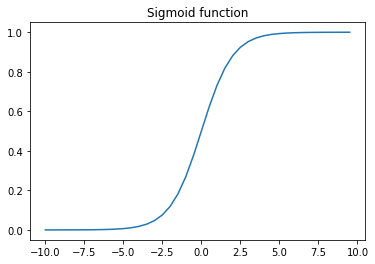

In [15]:
x = np.arange(-10,10,0.5)
y = 1/(1+np.exp(-x))
plt.plot(x,y);
plt.title("Sigmoid function");

#### Softmax  
Softmax se používá jako aktivační funkce na výstupní vrstvě pro případ multiclass klasiifikační úlohy. Stejně jako softmax provádí převod intervalu [-inf, +inf] na [0,1], navíc ale provádí normování. To znamená, že pravděpodobnosti všech tříd se po použití softmaxu dají sečíst na jedničku. Matematický předpis nabývá tvaru  
$f(x_i)=\frac{exp(x_i)}{\sum_{j=1}^{k}exp(x_j)}$  
V kódu se vytvoří pomocí *torch.nn.Softmax(dim=1)* - zde *dim* specifikuje, přes kterou osu má proběhnout normalizace tříd.


#### Tanh  
Hyperbolický tangent se chová podobně jako sigmoid. Nicméně jeho použití vede k rychlejšímu natrénování sítě (viz Y. Lecun et al.: [Efficient BackProp](https://www.researchgate.net/publication/2811922_Efficient_BackProp), sekce 4.3 a 4.4). Tanh bohužel se sigmoidem sdílí i problém s vanishing gradientem. No a jelikož interval [-inf,+inf] převádí na [-1,1], není tudíž vhodný na použití pro výstupní vrstvu.  
$f(x) = \frac{exp(x) - exp(-x)}{exp(x) + exp(-x)}$  
Kód - *torch.nn.Tanh()*.

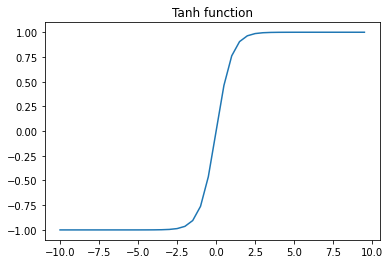

In [2]:
x = np.arange(-10,10,0.5)
y = (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
plt.plot(x,y);
plt.title("Tanh function");

#### ReLU
ReLU (rectified linear unit) je definována jako  

$f(x) = max(0,x)$

Dnes je asi nejpoužívanější aktivační funkcí. Důvodem tkví ve snížení pravděpodobnosti, že dojde ke gradient vanishingu. To je dáno tím, že pro kladné x je gradient konstantní. Drobným bonusem jsou i v porovnání se sigmoidem/tanh nižší výpočetní nároky. Trochu problémů může přinést způsob, jakým se do ReLU dostává nelinearita - nulovou hodnotou pro x<0. Pokud by se do této oblasti při trénování dostal větší počet neuronů, byla by jejích výstupem nula a trénování by se zastavilo (tzv. dying ReLU problem). Proto se občas používá Leaky ReLU definované vztahem (konstanta pro x<0 je víceméně irrelevantní, pakliže je tedy malá)  

$f(x) = x $  pro $x > 0$  
$f(x) = 0,01x $ pro $x\le0$  

Kód - *torch.nn.ReLU()*.

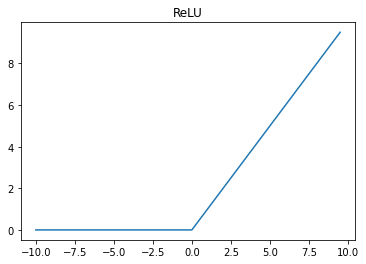

In [17]:
x = np.arange(-10,10,0.5)
y = np.where(x < 0, 0, x)
plt.plot(x,y)
plt.title("ReLU");

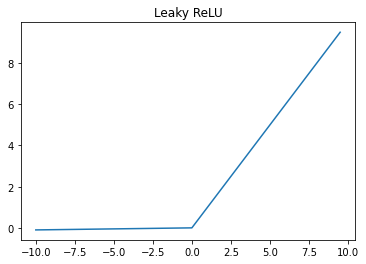

In [16]:
x = np.arange(-10,10,0.5)
y = np.where(x < 0, 0.01*x, x)
plt.plot(x,y)
plt.title("Leaky ReLU");

### Ztrátová funkce  
Nyní můžeme vzít prediktory pro jeden záznam, umístit je do vstupní vrstvy a postupným počítáním se dobrat až k výstupu poslední vrstvy. Tomu se říká *forward pass*. Nyní bychom rádi věděli, jak moc se takto vypočítaná čísla liší od realných hodnot. K tomu nám poslouží ztrátová funkce (*loss function*) *L*. Obecně platí, že čím je výstup této funkce vyšší, tím horší předpověď neuronové sítě je. Ztrátových funkcí existuje podobně jako aktivačních funkcí mnoho druhů s tím, že na různé úlohy se nejlépe hodí různé z nich.  

#### Mean squared error  (MSE)
Průměrná hodnota čtverce rozdílu reálné hodnoty $y$ a výstupu sítě $\hat{y}$ se používá pro regresní úlohy. Nepřekvapí, že akcentuje velikost rozdílu mezi odečítanými hodnotami. Její definice:  

$L_{MSE}(y, \hat{y}) = \frac{1}{n}\sum_{i=1}^{n}(y-\hat{y})^2$  

Existují i funce příbuzné, například mean absolute error (MAE)  

$L_{MAE}(y, \hat{y}) = \frac{1}{n}\sum_{i=1}^{n}|y-\hat{y}|$  

anebo root mean squared error (RMSE)  

$L_{RMSE}(y, \hat{y}) = \frac{1}{n}\sqrt{\sum_{i=1}^{n}(y-\hat{y})^2}$  

Použití v kódu: *loss_function = torch.nn.MSELoss()*.


#### Cross-entropy loss
Cross-entropy loss je určená pro klasifikační úlohy o X třídách. Je je definovaná jako  

$L_{categorical}(y, \hat{y}) = -\sum_{i}y_iln(\hat{y_i})$ 

Zdůrazněme, že $y_i$ i $\hat{y_i}$ mají význam pravděpodobnosti. Vidíme, že v optimálním případě bude hodnota ztrátové funkce nulová (pravděpodobnosti stoprocentní), v neideálním (faktické a predikované pravděpodobnosti různé od jedničky a  vzájemně odlišné) kladná. Koneckonců kvůli konzistenci s jinými ztrátovými funkcemi se zde vyskytuje znaménko mínus. Logaritmus hodnoty x pro x menší než základ logaritmu, který je v PyTorchi obvykle Eulerovo číslo, je totiž záporný.  
Variací na toto je binary cross-entropy pro úlohy o dvou možných třídách  

$L_{binary}(y, \hat{y}) = -yln(\hat{y})-(1-y)ln(1-\hat{y})$  

Vidíme, že $L_{categorical}$ se redukuje na $L_{binary}$, pokud *i* může nabývat pouze dvou hodnot a platí, že $y_1 + y_2 = 1$.   
Teď ale pár slov o tom, jak je cross-entropy loss implementovaná v Pytorchi. Jednak existuje ve fromě torch.nn.NLLLoss. V takovém případě čeká, že bude ve výstupní vrstvě použit jako aktivační funkce logaritmus softmaxu (nebo spíše funkce LogSoftmax, která ošetřuje problém s logaritmu na exponenciálu a s tím spjaté problémy). Dále zde máme torch.nn.CrossEntropyLoss. Ta v sobě LogSoftmax a NLLLoss spojuje. To mimo jiné znamená, že se ve výstupní vrstvě nesmí použít žádná aktivační funkce. V podobném vztahu jsou i binární cross-entropy ztrátové funkce BCELoss a BCEWithLogitsLoss (= sigmoid na výstupu + BCELoss).  

Použití v kódu: *loss_function = torch.nn.CrossEntropyLoss()*.

### Backpropagace
Provedli jsme forward pass a spočítali hodnotu ztrátové funkce. Nyní bychom rádi tuto hodnotu minimalizovali, aby síť dokázala provádět správné predikce. Onu minimalizaci provedeme vhodnou změnou vah $w_i$. Nicméně jak tuto změnu realizovat? Přeci jen náhodné tipování by asi k cíli nevedlo.  
Musíme použít některý z optimizérů. Z nich asi nejklasičtějším je tzv. *gradient descent*. Jeho definice vypadá následovně:  
$w_{i}^{new} = w_{i}^{old} - \alpha\frac{\partial L}{\partial w_{i}^{old}}$  
Co se tady vlastně děje? Nová hodnota váhy se počítá jako stará hodnota váhy opravená o člen beroucí v úvahu to, jak se s touto vahou mění hodnota ztrátové funkce. Proč zde máme znaménko mínus? Snažíme se nalézt minimum L v závislosti na w. Dejme tomu, že předpis pro ztrátovou funkci má podobu $L = w^2$ a my se nacházíme v bodě w = 5. Chceme se dostat do minima, tj. do bodu w = 0. Derivace L podle w činí 2w, tj. po dosazení 10. Pokud bychom desítku k původní hodnotě váhy přičetli, od kýženého cíle bychom se vzdálili. Dobrá, to vysvětluje mínus. Co je ale ono alfa? Jedná se o tzv. learning rate. Pro pochopení jeho významu se vraťme k našemu příkladu. Nyní desítku nebudeme k pětce přičítat, nýbrž odečítat. Výsledkem je -5. Tj. vyrazili jsme sice správným směrem, ale náš cíl - nulu - jsme značně přestřelili. Pro jiné ztrátové funkce by se mohlo dokonce stát, že namísto setrvání na konstatní vzdálenosti bychom se krok po kroku od cíle vzdalovali. Proto musí být derivace zmenšována learning ratem. Samozřejmě se to nesmí přehnat - pokud by byl learning rate přilíš malý, tak bychom k cíli nikdy nedokonvergovali.  
No jo, to je všechno sice hezké, ale jak vůbec onu derivaci ztrátové funkce vlastně spočítat? Přeci jen v sekci věnované ztrátovým funkcím se ve vzorcích žádná váha nevyskytovala. Na řešení tohoto problému použijeme proces zvaný backpropagace. Demonstrujeme si ho na příkladu sítě z obrázku č. 1. Předpokládejme, že všechny neurony včetně výstupního maji jako aktivační funkci softmax a že ztrátovou funkcí je MSE (ano, takhle asi normální síť vypadat nebude, ale jako ukázkový příklad je to vyhovující). Pro jednoduchost ignorujme existenci biasů a provádějme backpropagaci poté, co sítí probublal jeden trénovací záznam.  
Připomeňme si použité matematické výrazy. Nejprve ztrátová funkce (y je target trénovacího záznamu, jenž se nemění, $\hat{y_E}$ představuje výstup sítě, který chceme optimalizovat):  

$L = (y-\hat{y_E})^2$  

Výstup neuronu, dejme tomu neuronu E:  

$\hat{y_E} = sigmoid(z_E) = \frac{1}{1+exp(-z_E)}$  

No a hodnota v neuronu před použítím aktivační funkce:  

$z_E = w_5y_C + w_6y_D$  

Proveďme pomocný výpočet, který se nám posléze bude mnohokrát opakovat:  

$\frac{dy_X}{dz_X} = \frac{d}{dz_X}\frac{1}{1+exp(-z_X)} = \frac{-\frac{d}{dz}(1+exp(-z_X))}{(1+exp(-z_X))^2} = \frac{exp(-z)}{(1+exp(-z))^2} = \frac{1}{1+exp(-z_X)} \frac{exp(-z_X) + 1 - 1}{1+exp(-z_X)} = \frac{1}{1+exp(-z_X)}(1-\frac{1}{1+exp(-z_X)}) = y_X(1-y_X)$

Jak by tedy vypadá derivace ztrátové funkce podle jednotlivých vah, která se posléze dosadí do vztahu uvedeného na začátku této sekce? Podívejme se nejprve na derivaci podle $w_5$:  

$\frac{\partial L}{\partial w_5}=\frac{\partial L}{\partial y_E}\frac{\partial y_E}{\partial z_E}\frac{\partial z_E}{\partial w_5} = [-2(y-y_E)][y_E(1-y_E)][y_C]$

V tomto výrazu už všechny proměnné známe (y bez indexu je target z trénovacích dat, y s indexy C a E jsou výstupy neuronů C a E po aplikaci aktivačních funkcí). Derivace podle $w_6$ by byla téměř stejná, pouze by došlo k nahrazení $y_C$ za $y_D$. Obdobně pro váhy s indexy 1 až 4 by se počítalo  

$\frac{\partial L}{\partial w_3}=\frac{\partial L}{\partial y_C}\frac{\partial y_C}{\partial z_C}\frac{\partial z_C}{\partial w_3}= [\frac{\partial L}{\partial z_E}\frac{\partial z_E}{\partial y_C}][\frac{\partial y_C}{\partial z_C}][\frac{\partial z_C}{\partial w_3}] = [w_5\frac{\partial L}{\partial z_E}][y_C(1-y_C)][y_B] = [w_5\frac{\partial L}{\partial y_E}\frac{\partial y_E}{\partial z_E}][y_C(1-y_C)][y_B] = [w_5(-2(y-y_E))y_E(1-y_E)][y_C(1-y_C)][y_B]$  

### Optimizéry  
V rámci výpočtu v sekci backpropagace jsme upravovali váhy sítě po každém jednotlivém záznamu. Předtím jsme u ztrátových funkcí zase počítali s tím, že se budou vyhodnocovat najednou všechna data. Jaký přístup tedy platí? Inu, platit mohou oba + tu je ještě jeden navíc:  
- batch gradient descent - u toho přístupu se ztrátová funkce vypočte jako průměr přes všechny záznamy. Poněkud nepříjemné je, že výpočet má tendenci zaseknout se v některém lokálním minimu ztrátové funkce a nedosáhne tak do nejoptimálnější globálního minima. No a pak tu je drobný technický problém - dost často nebude možné nacpat celý dataset do paměti.
- stochastic gradient descent - zde updaty vah probíhají po forward passu každého jednotlivého trénovacího záznamu. Tím je trénování mnohem rychlejší - po 100 záznamech dojde 100x k updatování vah a ne pouze k updatu jednomu, jako tomu bylo v předchozím případě. Díky tomu, že jsou jednotlivé záznamy zašuměné, dochází k vyskakování z lokálních minim (u batch gradient descent k tomu moc nedochází, neboť šum je přes množství záznamů vyprůměrován). Jenže občas se vyskočí i z minima globálního.
- mini-batch - jedná se o kombinaci předchozích - updaty vah probíhají po forward passu n záznamů. Takovýto update se nazývá iterace, kterých proběhne pro projití celého datasetu o N záznamech. Tj. počet iterací na dataset je N/n. Průchod celým trénovacím datasetem se nazývá epocha.  

Toliko teorie. V Pytorchi je zrada v tom, že všechny tyto věci lze realizovat jedním optimizérem nazvaným SGD. Velikost batche se nastavuje jiným způsobem.  
Když už mluvíme o optimizérech neboli věcech, které se starají o updatování vah, obyčejný gradient descent ukázaný výše je jen tím nejstarším z mnoha dalších, často mnohem mocnějších. Připomeňme si jeho vzorec: 

$w_{i}^{new} = w_{i}^{old} - \alpha\frac{\partial L}{\partial w_{i}^{old}}$  



Zdůrazněme, že learning rate $\alpha$ má pro všechny váhy stejnou hodnotu, což je jeden z důvodů proč by měly být prediktory normalizované.  
V Pytorchi se SGD optimizér vytváří kódem
```python
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
```
Zde model je neuronová síť (viz popis kódu níže), *lr* značí learning rate.

Problém s čistým gradient descentem je v tom, že má tendenci se zaseknout v lokálních minimech. Řešením je věc zvaná momentum. To je v překladu hybnost, fakticky se to ale chová spíš jako setrvačnost. Změna vah díky němu je totiž závislá i na vzdálenější minulosti vah a to sice podle následujícího předpisu:  

$w_{i}^{new} = w_{i}^{old} - \alpha\frac{\partial L}{\partial w_{i}^{old}} + \mu(|w_{i}^{old}-w_{i}^{older}|)$  

Zde $\mu$ je momentum rate, ktere obvykle nabývá hodnot od 0,10 do 0,99, nejčastěji ale 0,9.  

Jak tuto záležitost zrealizujeme v kódu? Použije se opět *SGD*, avšak přidá se parametr momentum (jeho defaultní hodnota je 0, tj. defautlně je u *SGD* vypnutý):
```python
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
```

Existuje ještě cosi nazvaného v originále Nesterov momentum. Zatímco u klasického momentu (fakt nechci používat termín hybnost) se nejprve spočítá gradient na stávající váze a váha se pak s jeho pomocí updatuje, u  Nesterova momentu se nejprve změní hodnota váhy (na základě starého gradientu) a gradient se přepočítá až posléze. Myšlenka by měla být taková, že se při tom koriguje případná chyba z první části. Obecně by mělo použítí Nestorova momentu vést k rychlejší konvergenci.  
Nesterův moment se opět realizuje parametrem v *SGD*, který se nepřekvapivě jmenuje *nesterov* (defaultně je toto chování vypnuté, tj. parametr má hodnotu False).
```python
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, nesterov=True)
```

Dalším optimizérem je *Adagrad* (adaptive gradient algorithm). Zatímco *SGD* má learning rate pro všechny váhy stejný, u Adagradu má každý prediktor svůj vlastní learning rate. Ten se navíc dynamicky mění. Je větší pro méně časté prediktory (myšleno binární prediktory, kde se převážně vyskytuje hodnota 0) a menší pro často se vyskytující prediktory. To znamená, že se Adagrad hodí na sparse matice (spjaté např. s NLP). Pokud se ptáte, co se děje pro prediktory se spojitými proměnnými... no, netuším :D. Každopádně vzoreček vypadá takto:  

$w_{i}^{new} = w_{i}^{old} - \frac{\alpha}{\sqrt{G_i+\epsilon}}\frac{\partial L}{\partial w_{i}^{old}}$  

Zde G představuje sumu druhých mocnin gradientů z předchozích cyklů. Jelikož se jedná o druhé mocniny, jsou všechny kladné a G tak s časem monotóně roste. Nakonec se tak efektivní learning rate dostane do nuly, což znamená konec učení. Parametr $\epsilon$ zde je kvůli tomu, aby na začátku nedošlo k dělení nulou.  
Kód:  
```python
optimizer = torch.optim.Adagrad(model.parameters(), lr=0.01)
```
Parametr $\epsilon$ (nazvaný *eps*) má defaultní hodnotu $10^{-10}$ a asi není důvod ho měnit.  

Jiným známým optimizérem je *RMSProp* (root mean square propagation). Jedná se vlastně o rozšíření jiného optimizéru - rprop (resilient backpropagation). Ten se díval nikoli na velikost gradientu, ale pouze na jeho znaménko (de facto byl gradient normován svou absolutní hodnotou). Platilo navíc, že pokud bylo znaménko dva gradienty po sobě stejné, zvýšil se learning rate, v opačném případě došlo k jeho zmenšení. Problém s rprop byl v tom, že byl použitelný pro batch gradient descent, nikoli ale pro minibatche. Kdyby byl totiž gradient pro devět minibatchů +0.1 a pro desátý -0.9, learning rate by se značně zvětšil. Proto byl vymyšlen RMSProp, který funguje obdobně, avšak gradienty normuje odmocninou klouzavých průměrů jejich druhých mocnin. Tj. platí  

$E_{i}^{old} = \beta E_{i}^{older}+(1-\beta)(\frac{\partial L}{\partial w_{i}^{old}})^2 $  

$w_{i}^{new} = w_{i}^{old} - \frac{\alpha}{\sqrt{E_{i}^{old}+\epsilon}}\frac{\partial L}{\partial w_{i}^{old}}$  

Kód:  
```python
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.01)
```
Nepovinnými parametry jsou *alpha* (jedná se o betu ze vzorce výše :D) s defaultní hodnotou 0.99 a *eps*.  

Posledním a asi nejdůležitějším optimizérem je Adam (aka adaptive moment estimation). Ten je zadefinován takto:  

$m_{i}^{new} = \beta_1 m_{i}^{old} + (1-\beta_1)(\frac{\partial L}{\partial w_{i}^{old}})$  
$v_{i}^{new} = \beta_2 m_{i}^{old} + (1-\beta_2)(\frac{\partial L}{\partial w_{i}^{old}})^2$  
$w_{i}^{new} = w_{i}^{old} - \frac{\alpha m_{i}^{new}}{\sqrt{v_{i}^{new} + \epsilon}}$

Kód:
```python
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
```
Jako nepovinný parametr tu je *betas* (defaultně *betas*=(0.9, 0.999)) a *eps* (defaultně *eps*=1e-08).

Fakticky se asi dá říci, že pokud nemá člověk nějaký speciální důvod k tomu činit opak, měl by zvolit za optimizér právě Adama.


### Dense síť v Pytorchi

Přejděme nyní od teorie k praxi. Nejprve si ukážeme výseky kódu umístěné v "nespustitelném" textu, spustitelný kód bude následovat až posléze.  
Začněme s architekturu neuronové sítě. Vytvoříme si nové třídy dědíci od *torch.nn.Module*. V konstruktoru si zadefinujeme jednotlivé prvky sítě coby atributy objektu. V metodě *forward* tyto prvky na sebe navážeme. Nakonec vytvoříme instanci sítě a přesuneme ji na vhodnou výpočetní lokaci.
```python
class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.first_linear = torch.nn.Linear(4,6)
        self.second_linear = torch.nn.Linear(6,3)
        self.relu = torch.nn.ReLU()     

    def forward(self, x):
        x = self.first_linear(x)
        x = self.relu(x)
        x = self.second_linear(x)
        return x

device = "cuda" if torch.cuda.is_available() else "cpu"
model = NeuralNetwork().to(device)
```
Následně zvolíme ztrátovou funkci a optimizér. Do konstruktoru optimizéru vstupuje *model.parameters()*. Tato metoda vrací generátor s věcmi, které bude optimizér ladit - tenzory s váhami a biasy.
```python
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
```
Nyní je na čase specifikovat trénovací smyčku. Nejprve pošleme tenzor prediktorů i tenzor targetů do správné výpočetní lokace. Následně vypočteme predikci i ztrátu. Jelikož zde pracujeme v batchovém modu, tj. v rámci jedné iterace probereme celou epochu, je ztráta sumou ztrát přes všechny záznamy. Nyní musíme vynulovat uložené gradienty z předchozího učícího cyklu (*optimizer.zero_grad()*), na základě aktuální ztráty spočítat nové gradienty (*loss.backward()*) a s jejich pomocí aktualizovat váhy (*optimizer.step()*). Nakonec vezmeme ztrátu (z 1x1 tenzoru ji vyjmeme pomocí metody *item()*, vložíme ji do listu s ostatními trénovacími ztrátami a vytiskneme ji (na 8 platných cifer). Bacha - tato ztráta je průměrem ztrát přes všechny záznamy v (mini)batchi. Tj. její dělení velikostí minibatche povede k nesmyslnému číslu.
```python
def training_function(
    predictors_train, target_train, model, 
    loss_function, optimizer, device, training_loss,
    print_flag
):
    predictors_train = predictors_train.to(device) 
    target_train = target_train.to(device)
        
    prediction = model(predictors_train.float())
    loss = loss_function(prediction, target_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss = loss.item()
    training_loss.append(loss)
    if print_flag:
        print(f"Training loss: {loss:>8f} ")
```
Následně si zadefinujeme testovací smyčku. Opět se na začátku přenášejí tenzory prediktorů i targetů na příslušný device. Následně se spočítá predikce, ztráta a počet správně predikovaných záznamů. To vše v kontextovém manageru *with torch.no_grad*. Tato konstrukce slouží k tomu, aby se vypnul výpočet gradientu, díky čemu celá oprerace klade menší nároky na paměť (koneckonců i kdybychom tady nějaký gradient spočítali, v trénovací smyčce se vynuluje). Nakonec si spočítáme accuracy, kterou i se ztrátou vytiskneme.  
Pozn.: jelikož máme dataset, kde jsou všechny třídy stejnoměrně zastoupeny, není použití accuracy zas tak problematické. Samozřejmě pro ostré použití by to asi chtělo jinou metriku.
```python
def testing_function(
    predictors_test, target_test, 
    model, loss_function, device, testing_loss,
    print_flag
):
    predictors_test = predictors_test.to(device)
    target_test = target_test.to(device)
    
    with torch.no_grad():
        prediction = model(predictors_test.float())
        test_loss = loss_function(prediction, target_test).item()
        correct = (prediction.argmax(1) == target_test).type(torch.float).sum().item()

    accuracy = correct/len(target_test)
    testing_loss.append(test_loss)
    if print_flag:
        print(f"Test Error: \n Accuracy: {(100*accuracy):>0.1f}%, Loss: {test_loss:>8f} \n")
```
Nakonec musíme přidat smyčku, která bude v rámci každé epochy volat učící a testovací funkce.
```python
epochs = 1000
training_loss = []
testing_loss = []
for epoch_index in range(epochs):
    if (epoch_index+1)%100 == 0:
        print_flag = True
        print(f"Epoch {epoch_index+1}\n------------------------------------------------")
    else:
        print_flag = False

    training_function(
        scaled_predictors_train_tensor, target_train_tensor, 
        model, loss_function, optimizer, device, training_loss,
        print_flag
    )
    testing_function(
        scaled_predictors_test_tensor, target_test_tensor, 
        model, loss_function, device, testing_loss,
        print_flag
    )
print("Training has been completed.")
```
A neměli bychom zapomenout na vykreslení grafu, abychom viděli, jestli náhodou nedošlo k overfitu.
```python
plt.plot(training_loss)
plt.plot(testing_loss)
plt.title("Comparison of training and testing loss")
plt.xlabel("Epoch number")
plt.ylabel("Loss")
plt.legend(["train", "test"]);
```

Epoch 100
------------------------------------------------
Training loss: 0.833411 
Test Error: 
 Accuracy: 56.7%, Loss: 0.931106

Epoch 200
------------------------------------------------
Training loss: 0.670990 
Test Error: 
 Accuracy: 56.7%, Loss: 0.761044

Epoch 300
------------------------------------------------
Training loss: 0.559931 
Test Error: 
 Accuracy: 56.7%, Loss: 0.642015

Epoch 400
------------------------------------------------
Training loss: 0.481586 
Test Error: 
 Accuracy: 70.0%, Loss: 0.553599

Epoch 500
------------------------------------------------
Training loss: 0.422764 
Test Error: 
 Accuracy: 80.0%, Loss: 0.482262

Epoch 600
------------------------------------------------
Training loss: 0.375264 
Test Error: 
 Accuracy: 90.0%, Loss: 0.422229

Epoch 700
------------------------------------------------
Training loss: 0.336326 
Test Error: 
 Accuracy: 93.3%, Loss: 0.371211

Epoch 800
------------------------------------------------
Training loss: 0.304486 

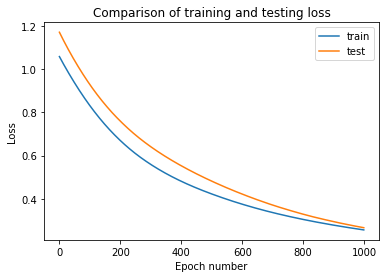

In [6]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.first_linear = torch.nn.Linear(4,6)
        self.second_linear = torch.nn.Linear(6,3)
        self.relu = torch.nn.ReLU()     

    def forward(self, x):
        x = self.first_linear(x)
        x = self.relu(x)
        x = self.second_linear(x)
        return x

def training_function(
    predictors_train, target_train, model, 
    loss_function, optimizer, device, training_loss,
    print_flag
):
    predictors_train = predictors_train.to(device) 
    target_train = target_train.to(device)
        
    prediction = model(predictors_train.float())
    loss = loss_function(prediction, target_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss = loss.item()
    training_loss.append(loss)
    if print_flag:
        print(f"Training loss: {loss:>8f} ")

def testing_function(
    predictors_test, target_test, 
    model, loss_function, device, testing_loss,
    print_flag
):
    predictors_test = predictors_test.to(device)
    target_test = target_test.to(device)
    
    
    with torch.no_grad():
        prediction = model(predictors_test.float())
        test_loss = loss_function(prediction, target_test).item()
        correct = (prediction.argmax(1) == target_test).type(torch.float).sum().item()

    accuracy = correct/len(target_test)
    testing_loss.append(test_loss)
    if print_flag:
        print(f"Test Error: \n Accuracy: {(100*accuracy):>0.1f}%, Loss: {test_loss:>8f}\n")

device = "cuda" if torch.cuda.is_available() else "cpu"
model = NeuralNetwork().to(device)
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

epochs = 1000
training_loss = []
testing_loss = []
for epoch_index in range(epochs):
    if (epoch_index+1)%100 == 0:
        print_flag = True
        print(f"Epoch {epoch_index+1}\n------------------------------------------------")
    else:
        print_flag = False
    training_function(
        scaled_predictors_train_tensor, 
        target_train_tensor, model, 
        loss_function, optimizer, device, training_loss,
        print_flag
    )
    testing_function(
        scaled_predictors_test_tensor, 
        target_test_tensor, 
        model, loss_function, device, testing_loss,
        print_flag
    )
print("Training has been completed.")
plt.plot(training_loss)
plt.plot(testing_loss)
plt.title("Comparison of training and testing loss")
plt.xlabel("Epoch number")
plt.ylabel("Loss")
plt.legend(["train", "test"]);

Když budeme chtít separátně predikovat jeden záznam:

In [138]:
one_flower_data = [[5.1, 3.5, 1.4, 0.2]]
one_flower_data_scaled = scaler_standard.transform(one_flower_data)
model(torch.tensor(one_flower_data_scaled, dtype=torch.float))

tensor([[9.9962e-01, 3.5742e-04, 2.1419e-05]], grad_fn=<SoftmaxBackward>)

Vidíme tedy, že záznam patří do třídy nula.

Pokud chceme vidět hodnoty natrénovaných vah a biasů, musíme iterovat skrze *model.parameters()*. Popořadě vidíme tensor s váhami mezi vstupní a skrytou vrstvou (počet sloupců odpovídá počtu neuronů na vstupu, počet řádků počtu neuronů v skryté vrstvě), biasy neuronů skryté vrstvy, váhy pro přenos dat ze skryté vrstvy do vrstvy výstupní a nakonec biasy neuronů výstupní vrstvy.

In [151]:
for param in model.parameters():
    print(param.data)

tensor([[-0.6802,  0.9106, -1.2377, -0.8025],
        [ 0.3611,  0.2494, -1.0059, -1.2421],
        [-0.1037, -0.5822,  0.0942, -0.5350],
        [-0.3903,  0.2221,  0.0998,  0.4802],
        [ 0.4602, -0.5523,  1.1910,  0.9661],
        [-0.1081,  0.0972, -0.0771, -0.3260]])
tensor([0.5124, 2.1203, 0.2244, 0.2276, 0.7244, 0.0303])
tensor([[ 1.2981,  0.6153,  0.0262, -0.3483, -1.2300,  0.2722],
        [-1.1254,  1.2054,  0.3833, -0.4465, -0.1897, -0.2362],
        [-0.7292, -2.2703, -0.4741,  0.0066,  1.3413, -0.2339]])
tensor([-1.2878,  0.6663,  0.2144])


### Minibatch  
V sekci výše jsme pracovali v batchovém modu, tj. váhy se updatovaly až po projití všech trénovacích záznamů. V praxi je ale lepší použití minibatche, kdy update probíhá na základě (a po napočítání) n trénovacích záznamů. Člověk by si sice mohl celou kódovou infrastukturu postavit sám, ale lepší bude využít možností, které Pytorch nabízí. Konkrétně se jedná o objekty typiu Dataset a Dataloader.  
Nejprve se vytvoří potomek *torch.utils.data.Dataset*. Ten by měl mít implementované následující metody: *\_\_init\_\_*, *\_\_len\_\_* a *\_\_getitem\_\_*. V příkladu níže v rámci konstruktoru do instance vkládáme jak trénovací prediktory, tak trénovací targety. To asi můžeme dovolit v příkladu s kosatci, nicméně pro normální úlohy by se to mohlo ukázat nevhodné a vlastně jdoucí proti smyslu Datasetu. Například kdybychom řešili problém klasifikace obrázků, tak bude lepší v rámci initu vytvořit slovník mapující index obrázku na jeho lokaci na disku než ty obrázky na stejném místě všechny najednou načítat. Na metodě *len* asi není co vysvětlovat, getitem by měl vracet jeden záznam (i když chceme minibatch o více záznamech).
```python
class IrisDataset(torch.utils.data.Dataset):
  def __init__(self, predictors, targets):      
        self.predictors = predictors
        self.targets = targets

  def __len__(self):
        return len(self.targets)

  def __getitem__(self, index):
        one_record_predictors = self.predictors[index]
        one_record_target = self.targets[index]
        return one_record_predictors, one_record_target
```
Následně se musí vytvořit instance DataLoaderu (*torch.utils.data.DataLoader*). Zde už není třeba žádné dědění, ale klasické volání:
```python
loader = torch.utils.data.DataLoader(iris_dataset, batch_size=9, shuffle=True, pin_memory=True)
```
Prvním argumentem DataLoaderu je instance datasetu, kterým chceme procházet. Následuje velikost minibatche - *batch_size*. Pokud není celkový počet záznamů v trénovací množině dělitelný *batch_size*, tak holt bude poslední minimabatch o něco menší než ty ostatní. Parametr *shuffle* říká, zda mají být data z datasetu brána náhodně nebo podle svého původního pořadí. Pro získání robustnějšího modelu je lepší, když bude pořadí náhodné. Proto bacha - defaultní hodnota *shuffle* je False. Nakonec tu máme parametr *pin_memory*. Ten urychlí případný přenos tenzorů na GPU (pakliže jsme přenos nerealizovali třeba v rámci Datasetu a opravdu plánujeme GPU použít).  
Pro případ, že bychom se asi hlavně kvůli sanity checku chtěli podívat na podobu první batche z dataloaderu, použijeme *next(iter(loader_train))*. Nicméně poté by bylo záhodno dataloader znovu inicializovat, aby nám spotřebovaná iterace nechyběla.   
Pakliže zapracujeme Dataset a Dataloader do předchozího kosatcového příkladu, bude to vypadat následovně:

Epoch 100
------------------------------------------------
Training loss: 0.587415 
Test Error: 
 Accuracy: 73.3%, Loss: 0.616483

Epoch 200
------------------------------------------------
Training loss: 0.432243 
Test Error: 
 Accuracy: 86.7%, Loss: 0.458482

Epoch 300
------------------------------------------------
Training loss: 0.331106 
Test Error: 
 Accuracy: 90.0%, Loss: 0.330256

Epoch 400
------------------------------------------------
Training loss: 0.173413 
Test Error: 
 Accuracy: 96.7%, Loss: 0.232739

Epoch 500
------------------------------------------------
Training loss: 0.116496 
Test Error: 
 Accuracy: 96.7%, Loss: 0.172618

Epoch 600
------------------------------------------------
Training loss: 0.119003 
Test Error: 
 Accuracy: 96.7%, Loss: 0.137046

Epoch 700
------------------------------------------------
Training loss: 0.155070 
Test Error: 
 Accuracy: 96.7%, Loss: 0.113805

Epoch 800
------------------------------------------------
Training loss: 0.094723 

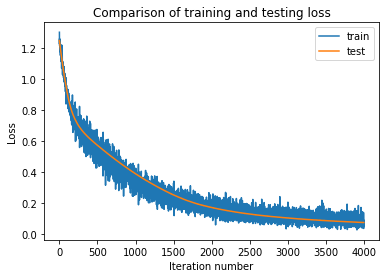

In [10]:
class IrisDataset(torch.utils.data.Dataset):
    def __init__(self, predictors, targets):      
        self.predictors = predictors
        self.targets = targets

    def __len__(self):
        return len(self.targets)

    def __getitem__(self, index):
        one_record_predictors = self.predictors[index]
        one_record_target = self.targets[index]
        return one_record_predictors, one_record_target

class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.first_linear = torch.nn.Linear(4,6)
        self.second_linear = torch.nn.Linear(6,3)
        self.relu = torch.nn.ReLU()     

    def forward(self, x):
        x = self.first_linear(x)
        x = self.relu(x)
        x = self.second_linear(x)
        return x

def training_function(
    predictors_train, target_train, model, 
    loss_function, optimizer, device, training_loss,
    print_flag
):
    predictors_train = predictors_train.to(device) 
    target_train = target_train.to(device)
        
    prediction = model(predictors_train.float())
    loss = loss_function(prediction, target_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss = loss.item()
    training_loss.append(loss)
    if print_flag:
        print(f"Training loss: {loss:>8f} ")

def testing_function(
    predictors_test, target_test, 
    model, loss_function, device, testing_loss,
    print_flag
):
    predictors_test = predictors_test.to(device)
    target_test = target_test.to(device)
    
    
    with torch.no_grad():
        prediction = model(predictors_test.float())
        test_loss = loss_function(prediction, target_test).item()
        correct = (prediction.argmax(1) == target_test).type(torch.float).sum().item()

    accuracy = correct/len(target_test)
    testing_loss.append(test_loss)
    if print_flag:
        print(f"Test Error: \n Accuracy: {(100*accuracy):>0.1f}%, Loss: {test_loss:>8f}\n")

device = "cuda" if torch.cuda.is_available() else "cpu"
model = NeuralNetwork().to(device)
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

iris_dataset = IrisDataset(scaled_predictors_train_tensor, target_train_tensor)
loader = torch.utils.data.DataLoader(iris_dataset, batch_size=30, shuffle=True, pin_memory=True)

epochs = 1000
training_loss = []
testing_loss = []
for epoch_index in range(epochs):
    for batch_index, batch in enumerate(loader):
        if ((epoch_index+1)%100 == 0) and batch_index == 3:
            print_flag = True
            print(f"Epoch {epoch_index+1}\n------------------------------------------------")
        else:
            print_flag = False
        training_function(
            batch[0], 
            batch[1], model, 
            loss_function, optimizer, device, training_loss,
            print_flag
        )
        testing_function(
            scaled_predictors_test_tensor, 
            target_test_tensor, 
            model, loss_function, device, testing_loss,
            print_flag
        )
print("Training has been completed.")
plt.plot(training_loss)
plt.plot(testing_loss)
plt.title("Comparison of training and testing loss")
plt.xlabel("Iteration number")
plt.ylabel("Loss")
plt.legend(["train", "test"]);

### Dense síť a obrázky
Podívejme se nyní na něco lehce pokročilejšího - zkusme v pomocí dense neuronové sítě provést klasifikaci obrázků z MNIST datasetu. Ten se skládá z jednobarevných obrázků o rozměrech 28x28 pixelů, na kterých jsou rukou psané číslice od 0 do 9.  
Nejprve se musíme nějak k datům dostat. Pro jednoduchost vezměme zavděk MNIST datasetu přibalenému v rámci *torchvision*, konkrétně výstupem funkce *torchvision.datasets.MNIST*. Prvním parametrem této funkce je místo, kde má Pytorch obrázková data hledat, resp. kam je má při parametru *download=True* z internetu stáhnout. Tento údaj nemá defaultní hodnotu, tj. člověk zde opravdu musí specifikovat adresář a nemůže se spoléhat na to, že se mu stáhnutá data uloží někde v jeho user adresáři. Bacha na relativní adresy a zpětná lomítka - když napíšete *root="/torch_mnist_files/"*, tak se Vám i na Windowsech data dostanou do rootu, tj. vytvoří se adresář C:\torch_mnist_files. Pokud tedy chcete vytvořit adresář v homu Jupyteru, musíte psát *root="torch_mnist_files/"*. Též je vhodné uvést parametr *train* (hodnoty True/False). Ten udává, zda se má v rámci volání funkce vrátit dataset s trénovacími či s testovacími daty.  
BACHA - pokud člověk nemá nainstalovaný balíček *ipywidgets* (*pip install ipywidgets*), tak funkce MNIST (minimálně při spouštění v Jupyteru) spadne.

In [2]:
dataset_train = torchvision.datasets.MNIST(root="torch_mnist_files/", download=True, train=True)
dataset_test = torchvision.datasets.MNIST(root="torch_mnist_files/", download=True, train=False)

Vidíme, že v trénovacím datasetu je 60 000 záznamů, v testovacím 10 000.

In [3]:
dataset_train

Dataset MNIST
    Number of datapoints: 60000
    Root location: torch_mnist_files/
    Split: Train

In [4]:
dataset_test

Dataset MNIST
    Number of datapoints: 10000
    Root location: torch_mnist_files/
    Split: Test

Co prvek datasetu, co tuple dvou věcí - obrázku a třídy

In [5]:
dataset_train[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x1BAC873CF88>, 5)

A opravdu se jedná o obrázek - dotaz na typ vrátí PIL.Image.Image.

In [6]:
dataset_train[0][0]

Máme tady tedy obrázek (objekt typu PIL.Image.Image), ale pro dense neuronovou síť bychom potřebovali jednorozměrný vektor. Hypoteticky bychom mohli obrázek převést na numerické pole pomocí funkce *asarray* funkci z balíčku numpy. Výsledek bychom měli dále podělit 255, aby čísla ležela v intervalu mezi nulou a jedničkou. Následoval by převod na teznor a přetvoření 2D matice 28x28 na 1D vektor o délce 784. 

In [7]:
import numpy as np
figure_as_array = np.asarray(dataset_train[0][0])/255
figure_as_tensor = torch.tensor(figure_as_array)
figure_as_1D_tensor = torch.squeeze(figure_as_tensor.view(784,-1))
figure_as_1D_tensor.shape

torch.Size([784])

Nešlo by to ale nějak elegantněji? Inu, v *torchvision* existuje třída (opravdu třída, nikoli funkce) ToTensor, která vezme PIL obrázek či numpoidní pole, znormalizuje ho (dělením maximální hodnotou 255) a převede na tenzor. Převod do 1D si tu už pravda musíme zajistit sami.

In [8]:
to_tensor_instance = torchvision.transforms.ToTensor()
figure_as_tensor = to_tensor_instance(dataset_train[0][0])
figure_as_1D_tensor = torch.squeeze(figure_as_tensor.view(784,-1))
figure_as_1D_tensor.shape

torch.Size([784])

OK, výsledek vypadá o něco líp, ale pořád je to takové nešikovné. Existuje elegantnější cesta, která využívá jeden z parametrů Datasetu - *transform*. Ten se položí rovný nějaké funkci a tato funkce bude uplatňována na každý prvek z datasetu přebíraný.  
Pokud se ptáte, proč má první prvek z dataset_trainu rozměry [1,28,28], tak je to počet barevných channelů (kanálů - u šedého obrázku je jen jeden, u barevného obrázku 3) a výška s šířkou.

In [9]:
dataset_train = torchvision.datasets.MNIST(
    root="torch_mnist_files/", download=True, train=True, 
    transform=torchvision.transforms.ToTensor()
    )
dataset_test = torchvision.datasets.MNIST(
    root="torch_mnist_files/", download=True, train=False,
    transform=torchvision.transforms.ToTensor()
    )

dataset_train[0][0].shape

torch.Size([1, 28, 28])

Pakliže člověk potřebuje na sebe napojit několik transformací, musí použít *torchvision.transforms.Compose*.

In [10]:
dataset_train = torchvision.datasets.MNIST(
    root="torch_mnist_files/", download=True, train=True, 
    transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Lambda(lambda x: torch.squeeze(x.view(784,-1)))
        ])
    )
dataset_test = torchvision.datasets.MNIST(
    root="torch_mnist_files/", download=True, train=False,
    transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Lambda(lambda x: torch.squeeze(x.view(784,-1)))
        ])
    )

dataset_train[0][0].shape

torch.Size([784])

Zjednorozměrnění tenzoru lze dosáhnout nejen s pomocí *torch.squeeze(x.view(784,-1))*, ale i s *torch.flatten(x)*.

In [18]:
dataset_train = torchvision.datasets.MNIST(
    root="torch_mnist_files/", download=True, train=True, 
    transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Lambda(lambda x: torch.flatten(x))
        ])
    )
dataset_test = torchvision.datasets.MNIST(
    root="torch_mnist_files/", download=True, train=False,
    transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Lambda(lambda x: torch.flatten(x))
        ])
    )

dataset_train[0][0].shape

torch.Size([784])

V předchozím příkladě jsme celý testovací dataset vyhodnocovali najednou. Nicméně i ten může být stejně jako trénovací dataset příliš velký a tak se musí brát po minibatchích.

In [11]:
loader_train = torch.utils.data.DataLoader(dataset_train, batch_size=128, shuffle=True, pin_memory=True)
loader_test = torch.utils.data.DataLoader(dataset_test, batch_size=1000, shuffle=True, pin_memory=True)

Následuje samotný kód s vytvořením a trénováním neuronové sítě. Možná Vás zarazí, proč je na druhém grafu nižší pro testovací data menší ztráta než pro data trénovací. To je dáno skutečností, že k vyhodnocení testovacích dat dojde v rámci dané epochy až poté, co proběhne trénování s průběžným zachycováním trénovací ztráty. Tj. fakticky testovací data vidí lepší model, než většina trénovacích dat. 

Epoch 1
----------------------------------------
Avg. loss per record - train: 0.5144125097977327
Avg. loss per record - test: 0.282414086163044
Correct predictions in current epoch: 9190.0
Avg. test accuracy: 0.919

Epoch 2
----------------------------------------
Avg. loss per record - train: 0.2622159062259233
Avg. loss per record - test: 0.22650277465581894
Correct predictions in current epoch: 9361.0
Avg. test accuracy: 0.936

Epoch 3
----------------------------------------
Avg. loss per record - train: 0.2088568624116973
Avg. loss per record - test: 0.18904304653406143
Correct predictions in current epoch: 9420.0
Avg. test accuracy: 0.942

Epoch 4
----------------------------------------
Avg. loss per record - train: 0.169425891803653
Avg. loss per record - test: 0.15578586459159852
Correct predictions in current epoch: 9549.0
Avg. test accuracy: 0.955

Epoch 5
----------------------------------------
Avg. loss per record - train: 0.14322960639654447
Avg. loss per record - test:

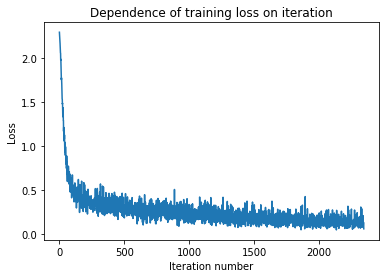

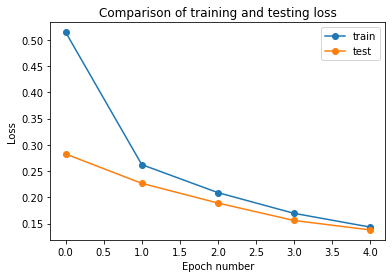

In [12]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.first_linear = torch.nn.Linear(784,50)
        self.second_linear = torch.nn.Linear(50,10)
        self.relu = torch.nn.ReLU()     

    def forward(self, x):
        x = self.first_linear(x)
        x = self.relu(x)
        x = self.second_linear(x)
        return x

def training_function(
    predictors_train, target_train, model, 
    loss_function, optimizer, device, training_loss    
):
    predictors_train = predictors_train.to(device) 
    target_train = target_train.to(device)
        
    prediction = model(predictors_train.float())
    loss = loss_function(prediction, target_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss = loss.item()
    training_loss.append(loss)       

def testing_function(
    predictors_test, target_test, 
    model, loss_function, device, testing_loss    
):
    predictors_test = predictors_test.to(device)
    target_test = target_test.to(device)
    
    with torch.no_grad():
        prediction = model(predictors_test.float())
        test_loss = loss_function(prediction, target_test).item()
        correct_pred_count = (prediction.argmax(1) == target_test).type(torch.float).sum().item()
        
    testing_loss.append(test_loss)
    return correct_pred_count

dataset_train = torchvision.datasets.MNIST(
    root="torch_mnist_files/", download=True, train=True, 
    transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Lambda(lambda x: torch.flatten(x))
        ])
    )
dataset_test = torchvision.datasets.MNIST(
    root="torch_mnist_files/", download=True, train=False,
    transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Lambda(lambda x: torch.flatten(x))
        ])
    )
loader_train = torch.utils.data.DataLoader(dataset_train, batch_size=128, shuffle=True, pin_memory=True)
loader_test = torch.utils.data.DataLoader(dataset_test, batch_size=1000, shuffle=True, pin_memory=True)

device = "cuda" if torch.cuda.is_available() else "cpu"
model = NeuralNetwork().to(device)
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epochs = 5

training_loss_epoch = []
training_loss_iteration = []
testing_loss_epoch = []
for epoch_index in range(epochs):
    print(f"Epoch {epoch_index+1}\n----------------------------------------")
    
    training_loss = []
    for batch_index, batch in enumerate(loader_train):
        training_function(
            batch[0], batch[1], model, 
            loss_function, optimizer, device, training_loss
        )
    training_loss_iteration += training_loss
    avg_loss_per_batch_train = sum(training_loss)/(batch_index+1)
    training_loss_epoch.append(avg_loss_per_batch_train)
    print(f"Avg. loss per record - train: {avg_loss_per_batch_train}")      
        
    testing_loss = []
    correct_pred_count = 0
    for batch_index, batch in enumerate(loader_test): 
        correct_pred_count += testing_function(
           batch[0], batch[1], model, 
           loss_function, device, testing_loss
        )
    avg_loss_per_batch_test = sum(testing_loss)/(batch_index+1)
    testing_loss_epoch.append(avg_loss_per_batch_test)
    print(f"Avg. loss per record - test: {avg_loss_per_batch_test}")
    print(f"Correct predictions in current epoch: {correct_pred_count}")
    print(f"Avg. test accuracy: {correct_pred_count/len(dataset_test):.3f}\n")
        
print("Training has been completed.")

plt.plot(training_loss_iteration)
plt.title("Dependence of training loss on iteration")
plt.xlabel("Iteration number")
plt.ylabel("Loss")

plt.figure()
plt.plot(training_loss_epoch, "o-")
plt.plot(testing_loss_epoch, "o-")
plt.title("Comparison of training and testing loss")
plt.xlabel("Epoch number")
plt.ylabel("Loss")
plt.legend(["train", "test"]);

## Konvoluční sítě
V sekci výše jsme použili na klasifikaci obrázků klasickou neuronovou síť, kde byl každý neuron jedné vrstvy spoijen s každým neuronem vrstev sousedících. Problém takovéhoto přístupu je vazba přítomnosti určitého objektu na určité lokaci (vlastně na určitý pixel) obrázku. Tj. po naučení neuronová síť například vždy očekává oblouček u cifry 2 ve středu horní části obrázku, ale nepočítá s tím, že někdo dvojku například umístí k levému okraji. Proto se na podobné úlohy používají konvoluční vrstvy, které nejsou vázány na hodnoty konkrétních pixelů, ale na přítomnost určitých charakteristických útvarů kdekoli na ploše obrázku.  
Fungování konvoluční vrstvy si vysvětlíme s pomocí obr. 3. Mějme na začátku šedý obrázek o rozměru 10x10 pixelů. Na ten začne působit konvoluční filtr, tzv. kernel. Ten v jeden okamžik ale nepůsobí na celý obrázek, ale pouze na jeho část, která má obvykle rozměry 2x2, 3x3 či 4x4 pixely. Když zde mluvím o působení, mám na mysli sumu element-wise násobení matic, tj. výstupem je pak jedna hodnota. Posléze se filtr posune, nejčastěji o jedno políčko - posun je buďto v horizontálním, anebo vertikálním směru, nikoli v obou směrech najednou. Následně kernel na částečně nové ploše opět provede svoje výpočty a vyprodukuje další číslo. Když takto postupně projede celý obrázek, je výsledekem matice čísel o velikosti 8x8. Následovat by mohla další konvoluční vrstva, anebo už "normální" vrstva neuronů (torch.nn.Linear). Pro převod se samozřejmě musí 2D matice převést na 1D vektor.  

![konvoluce](pytorch_images/convolution_principle.png)
<center>Obrázek 3: Nástin fungování konvoluce. Na původní obrázek o rozměrech 10x10 pixelů působí kernel o rozměrech 3x3 pixely. Výsledkem je feature mapa o rozměru 8x8 pixelů.</center>  

Výhodou takovéhoto přístupu je malý počet vah potřebný k natrénování jednoho kernelu (3x3 kernel má 9 vah + bias). Díky tomu lze nátrénovat kernelů více a to bez nějakých krvavých nároků na hardware. Proč by nám ale tohle mělo pomoci? Věc spočívá v tom, že v rámci učení se váhy kernelů mění tak, aby výsledkem aplikace kernelu na původní obrázek (anebo na výstup předchozích kernelů) byla feature mapa alias nějaký význačný vzor v obrázku (viz obr. 4). Význačným vzorem může být vertikální čára anebo třeba oko. Jelikož na začátku jsou váhy jednotlivých kernelů náhodné, během trénovací se kernely naučí zaměřovat se na jiné vzory (jeden se například zaměří na vertikální čáry, další na čáry horizontální a jiný třeba na tečky). Dále je vhodné si všimnout, že zatímco se kernely v prvních vrstvách vážou na jednoduché vzory (např. na čáry), kernely v dalších vrstvách se chytají na vzorky čím dál víc komplikované (viz obr. 4 dole). Jelikož složitých vzorů je více než vzorů jednoduchých, počet kernelů roste tím víc, čím dál sev síti dostáváme.

![filtry_a](pytorch_images/conv2_block1_out.jpg) ![filtry_b](pytorch_images/conv3_block4_out.jpg)
<center>Obrázek 4: Ukázka feature map pro konvoluční vrstvu první (nahoře) a trochu pozdější (dole).</center>  

Co se u takové konvoluční vrstvy dá vlastně nastavit? Už jsme mluvili o velikosti kernelu. Dalším parametrem je počet vstupních a výstupních channelů (kanálů). Vstup je dán buďto počtem channelů z předchozí konvoluční vrstvy, anebo barevností zdrojového obrázku, pokud vytváříme první konvoluční vrstvu. Pro obrázky ve stupni šedi je vstupní channel jen jeden, pro barevné jsou channely tři (barevný obrázek je totiž fakticky tvořen třemi jednobarevnými obrázky za červenou, zelenou a modrou barvu). Specifikovat se musí i počet výstupních channelů. Pokud je toto číslo příliš velké, větší než počet nalezitelných vzorů, jen zbytečně pltýváme výpočetní kapacitou. Pokud je číslo naopak malé, zbytečně podvazujeme možnosti sítě. Dalším parametrem je velikost posunu kernelu - hovoříme o tzv. stridu. Výše jsme se tvářili, že posun je vždy jedna, ale toto číslo může být i vyšší. Čím vyšší stride, tím menší je výška a šířka výsledné feature mapy. Nicméně obvykle je stride jedničkový, protože na zmenšování obrázků existuje vhodnější postup. Nakonec tu máme padding. Výše jsme zmínili, že když posouváme kernelem po ploše obrázku, fakticky je výsledná feature mapa o něco menší než originální obrázek. Proti tomu lze bojovat paddingem, který říká, o kolik políček může kernel z původního obrázku "přečuhovat" (tato dodatečná políčka se berou, jako by obsahovaly nulu) - viz obr. 5. Díky správně zvolenému paddingu má totiž vstup a výstup stejné rozměry a nehorzí tak, že bychom v hloubce sítě byli omezeni zkolabováním obrázku pod velikost kernelu.

![padding](pytorch_images/padding.png)
<center>Obrázek 5: Ukázka paddingu o velikosti 1. Původní pixely jsou vybarveny zeleně, paddingem přidané "pixely" jsou bílé.</center>  

#### Maxpooling
Pro konvoluční sítě jsou krom samotných konvolučních vrstev specifické i tzv. maxpooling vrstvy. O co se jedná? Tato vrstva rozdělí vstupní matici (teoreticky třeba i původní obrázek, obvykle ale feature mapu) a rozdělí ji na pooly alias vedle sebe postavené čtverce. Jejich velikost činí nejčastěji 2x2 pixely. Z každého čtverce se vezme jeden pixel - u maxpoolingu už jméno napovídá, že se bude jednat o ten s nejvyšší hodnotou. Z takto vybraných hodnot se vytvoří výstupní mapa, která je tak oproti vstupu poloviční (počet channelů se nemění).  
Myšlenka stojící za maxpoolingem tkví v tom, že ve feature mapách je jen vzácně důležitá informace obsažená stejnou měrou v sousedních pixelech (proto vybíráme ze čtyřech sousedních) a velice často se nachází v těch s vyšší intezitou (hodnotou). Tj. fakticky informaci neztrácíme, ale omezením velikosti map jsme zmenšili výpočetní náročnost následných operací.  
V pytorchi nalezneme maxpooling pro jeden, dva či tři rozměry a to sice jako separátní funkce. Tj. například pro maxpooling ve 2D, který je určen právě pro obrázky, existuje funkce **torch.nn.MaxPool2d**. Její jediný povinný parametr je velikost hrany čtverce označujícího oblast maxpoolingu. 

#### Dropout
Dropout vrstvy sice zmiňujeme až zde u konvolučních sítí, použít se ale mohou i u jiných architektur včetně klasické dense neuronové sítě. Jedná se o v případě neuronových sítí asi o nejčastější regularizační techniku, tj. techniku na boj s overfitováním. Principielně jde o to, že během trénování má každá spojnice mezi neurony sousedních vrstev určitou pravděpodobnost (obvykle 20%), že v dané epoše de facto nebude existovat. Díky tomu se nemůže neuronová sít vázat na konkrétní hodnoty konrktétních neuronů, ale musí se naučit dělat své predikce robustněji.  
Zdůrazněme ale, že mimo trénování k dropoutu nedochází. Jak vlastně pytoch pozná, že dropout má nebo nemá použít? No, musíme mu říct, že jsme vstoupili do vyhodnocnovací fáze a to sice pomocí metody **eval()** volané na příslušném ML modelu. Pakliže bychom chtěli zpátky do trénovacího modu, musíme použít metodu **train()** (defaultně je model po vytvoření v trénovacím modu). Pokud bychom z nějakého důvodu potřebovali vědět, ve kterém modu se model zrovna nachází, musíme se podívat na atribut **training** modelu.  
Samotný dropout je v pytorchi implementován jako funkce *torch.nn.Dropout*. Parametr *p* udává pravděpodobnost, že bude spojení jedno spojení neuronů dočasně přerušeno.

#### Batch normalization
Stejně jako dropout se i batch normalization používá u většího množství typů neuronových sítí. Společné s dropoutoutem má i další vlastnost - pomáhá zamezit overfitu. Dále je díky batch normalization síť robustnější na iniciální volbu vah a taktéž je možné zvětšit learning rate. Jelikož dropout komplikuje výpočty potřebné pro batch normalization, neměly by se oba tyto přístupy používat současně.  
Co přesně batch normalizace dělá? Pro každou minibatch spočte průměr a standardní odchylku a data potom vycentruje na nulu a naškáluje. Současně si tyto průměry a standardní odchylky uloží mimo, aby bylo podle čeho škálovat data při obyčejném  "netrénovacím" použití sítě. Díky vycentrování pak nedochází k tomu, že by byla data kvůli činnosti vrstev předchozích posunuta do takových oblastí aktivačních funkcí, kde by tyto funkce již byly nasycené (tím myslím, kde by se pro relativně velké změny x příliš neměnilo f(x)).    
V pytorchi existuje několik implementací batch normalizace, které jsou určeny pro různé rozměry vstupu. Jelikož nyní řešíme obrázky alias 2D matice, budeme pracovat s *torch.nn.BatchNorm2d*. Povinný je jeden parametr - počet channelů na vstupu. Obvykle se normalizační vrstvy umísťují těsně před aktivační funkci, byť zrovna u ReLU je to přeci jen s otazníkem.

Příklad použití konvoluční sítě s dropoutem.

Epoch 1
----------------------------------------
Avg. loss per record - train: 0.48958707326002465
Avg. loss per record - test: 0.14493158534169198
Correct predictions in current epoch: 9598.0
Avg. test accuracy: 0.960

Epoch 2
----------------------------------------
Avg. loss per record - train: 0.15603475613412318
Avg. loss per record - test: 0.0845109425485134
Correct predictions in current epoch: 9740.0
Avg. test accuracy: 0.974

Epoch 3
----------------------------------------
Avg. loss per record - train: 0.11690743215112036
Avg. loss per record - test: 0.06969285011291504
Correct predictions in current epoch: 9777.0
Avg. test accuracy: 0.978

Epoch 4
----------------------------------------
Avg. loss per record - train: 0.10039454828431485
Avg. loss per record - test: 0.05791048370301723
Correct predictions in current epoch: 9820.0
Avg. test accuracy: 0.982

Epoch 5
----------------------------------------
Avg. loss per record - train: 0.08859255578297415
Avg. loss per record -

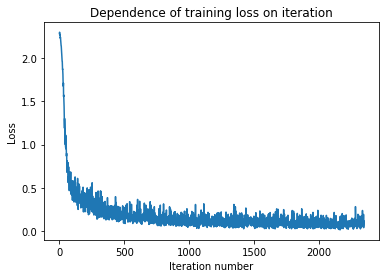

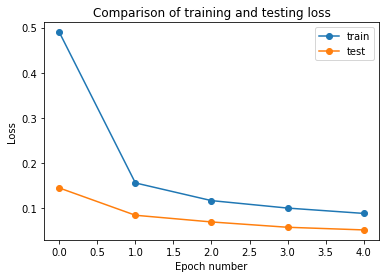

In [13]:
class ConvNeuralNetwork(torch.nn.Module):
    def __init__(self):
        super(ConvNeuralNetwork, self).__init__()
        self.first_conv = torch.nn.Conv2d(1,10, kernel_size=3)
        self.second_conv = torch.nn.Conv2d(10,30, kernel_size=3)
        self.linear = torch.nn.Linear(750,10)
        self.relu = torch.nn.ReLU()  
        self.max_pool = torch.nn.MaxPool2d(2)
        self.dropout = torch.nn.Dropout(p=0.2)

    def forward(self, x):
        x = self.first_conv(x)
        x = self.relu(x)
        x = self.max_pool(x)
        x = self.dropout(x)
        x = self.second_conv(x)
        x = self.relu(x)
        x = self.max_pool(x)
        x = self.dropout(x)
        x = torch.flatten(x, 1)
        x = self.linear(x)       
        return x

def training_function(
    predictors_train, target_train, model, 
    loss_function, optimizer, device, training_loss    
):
    predictors_train = predictors_train.to(device) 
    target_train = target_train.to(device)
        
    prediction = model(predictors_train.float())
    loss = loss_function(prediction, target_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss = loss.item()
    training_loss.append(loss)       

def testing_function(
    predictors_test, target_test, 
    model, loss_function, device, testing_loss    
):
    predictors_test = predictors_test.to(device)
    target_test = target_test.to(device)
    
    with torch.no_grad():
        prediction = model(predictors_test.float())
        test_loss = loss_function(prediction, target_test).item()
        correct_pred_count = (prediction.argmax(1) == target_test).type(torch.float).sum().item()
        
    testing_loss.append(test_loss)
    return correct_pred_count

dataset_train = torchvision.datasets.MNIST(
    root="torch_mnist_files/", download=True, train=True, 
    transform=torchvision.transforms.ToTensor()
    )
dataset_test = torchvision.datasets.MNIST(
    root="torch_mnist_files/", download=True, train=False,
    transform=torchvision.transforms.ToTensor()
    )
loader_train = torch.utils.data.DataLoader(dataset_train, batch_size=128, shuffle=True, pin_memory=True)
loader_test = torch.utils.data.DataLoader(dataset_test, batch_size=1000, shuffle=True, pin_memory=True)

device = "cuda" if torch.cuda.is_available() else "cpu"
model = ConvNeuralNetwork().to(device)
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epochs = 5

training_loss_epoch = []
training_loss_iteration = []
testing_loss_epoch = []
for epoch_index in range(epochs):
    print(f"Epoch {epoch_index+1}\n----------------------------------------")
    
    model.train()
    training_loss = []
    for batch_index, batch in enumerate(loader_train):
        training_function(
            batch[0], batch[1], model, 
            loss_function, optimizer, device, training_loss
        )
    training_loss_iteration += training_loss
    avg_loss_per_batch_train = sum(training_loss)/(batch_index+1)
    training_loss_epoch.append(avg_loss_per_batch_train)
    print(f"Avg. loss per record - train: {avg_loss_per_batch_train}")      
        
    model.eval()
    testing_loss = []
    correct_pred_count = 0
    for batch_index, batch in enumerate(loader_test): 
        correct_pred_count += testing_function(
           batch[0], batch[1], model, 
           loss_function, device, testing_loss
        )
    avg_loss_per_batch_test = sum(testing_loss)/(batch_index+1)
    testing_loss_epoch.append(avg_loss_per_batch_test)
    print(f"Avg. loss per record - test: {avg_loss_per_batch_test}")
    print(f"Correct predictions in current epoch: {correct_pred_count}")
    print(f"Avg. test accuracy: {correct_pred_count/len(dataset_test):.3f}\n")
        
print("Training has been completed.")

plt.plot(training_loss_iteration)
plt.title("Dependence of training loss on iteration")
plt.xlabel("Iteration number")
plt.ylabel("Loss")

plt.figure()
plt.plot(training_loss_epoch, "o-")
plt.plot(testing_loss_epoch, "o-")
plt.title("Comparison of training and testing loss")
plt.xlabel("Epoch number")
plt.ylabel("Loss")
plt.legend(["train", "test"]);

Úplně to samé, ale namísto dropoutu použita batch normalizace.

Epoch 1
----------------------------------------
Avg. loss per record - train: 0.2169622987516717
Avg. loss per record - test: 0.07549258694052696
Correct predictions in current epoch: 9758.0
Avg. test accuracy: 0.976

Epoch 2
----------------------------------------
Avg. loss per record - train: 0.06192709760827773
Avg. loss per record - test: 0.05327208675444126
Correct predictions in current epoch: 9832.0
Avg. test accuracy: 0.983

Epoch 3
----------------------------------------
Avg. loss per record - train: 0.047010224356230645
Avg. loss per record - test: 0.054216804727911946
Correct predictions in current epoch: 9827.0
Avg. test accuracy: 0.983

Epoch 4
----------------------------------------
Avg. loss per record - train: 0.0384977093345718
Avg. loss per record - test: 0.04079209957271814
Correct predictions in current epoch: 9868.0
Avg. test accuracy: 0.987

Epoch 5
----------------------------------------
Avg. loss per record - train: 0.03377215018414501
Avg. loss per record 

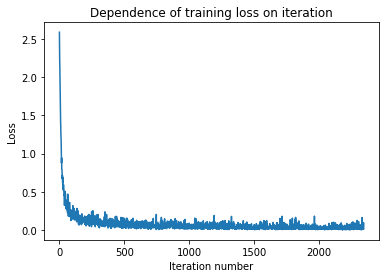

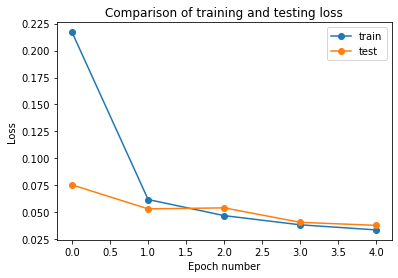

In [15]:
class ConvNeuralNetwork(torch.nn.Module):
    def __init__(self):
        super(ConvNeuralNetwork, self).__init__()
        self.first_conv = torch.nn.Conv2d(1,10, kernel_size=3)
        self.first_batch_norm = torch.nn.BatchNorm2d(10)
        self.second_conv = torch.nn.Conv2d(10,30, kernel_size=3)
        self.second_batch_norm = torch.nn.BatchNorm2d(30)
        self.linear = torch.nn.Linear(750,10)
        self.relu = torch.nn.ReLU()  
        self.max_pool = torch.nn.MaxPool2d(2)

    def forward(self, x):
        x = self.first_conv(x)
        x = self.first_batch_norm(x)        
        x = self.relu(x)
        x = self.max_pool(x)
        x = self.second_conv(x)
        x = self.second_batch_norm(x)
        x = self.relu(x)
        x = self.max_pool(x)
        x = torch.flatten(x, 1)
        x = self.linear(x)       
        return x

def training_function(
    predictors_train, target_train, model, 
    loss_function, optimizer, device, training_loss    
):
    predictors_train = predictors_train.to(device) 
    target_train = target_train.to(device)
        
    prediction = model(predictors_train.float())
    loss = loss_function(prediction, target_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss = loss.item()
    training_loss.append(loss)       

def testing_function(
    predictors_test, target_test, 
    model, loss_function, device, testing_loss    
):
    predictors_test = predictors_test.to(device)
    target_test = target_test.to(device)
    
    with torch.no_grad():
        prediction = model(predictors_test.float())
        test_loss = loss_function(prediction, target_test).item()
        correct_pred_count = (prediction.argmax(1) == target_test).type(torch.float).sum().item()
        
    testing_loss.append(test_loss)
    return correct_pred_count

dataset_train = torchvision.datasets.MNIST(
    root="torch_mnist_files/", download=True, train=True, 
    transform=torchvision.transforms.ToTensor()
    )
dataset_test = torchvision.datasets.MNIST(
    root="torch_mnist_files/", download=True, train=False,
    transform=torchvision.transforms.ToTensor()
    )
loader_train = torch.utils.data.DataLoader(dataset_train, batch_size=128, shuffle=True, pin_memory=True)
loader_test = torch.utils.data.DataLoader(dataset_test, batch_size=1000, shuffle=True, pin_memory=True)

device = "cuda" if torch.cuda.is_available() else "cpu"
model = ConvNeuralNetwork().to(device)
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epochs = 5

training_loss_epoch = []
training_loss_iteration = []
testing_loss_epoch = []
for epoch_index in range(epochs):
    print(f"Epoch {epoch_index+1}\n----------------------------------------")
    
    model.train()
    training_loss = []
    for batch_index, batch in enumerate(loader_train):
        training_function(
            batch[0], batch[1], model, 
            loss_function, optimizer, device, training_loss
        )
    training_loss_iteration += training_loss
    avg_loss_per_batch_train = sum(training_loss)/(batch_index+1)
    training_loss_epoch.append(avg_loss_per_batch_train)
    print(f"Avg. loss per record - train: {avg_loss_per_batch_train}")      
        
    model.eval()
    testing_loss = []
    correct_pred_count = 0
    for batch_index, batch in enumerate(loader_test): 
        correct_pred_count += testing_function(
           batch[0], batch[1], model, 
           loss_function, device, testing_loss
        )
    avg_loss_per_batch_test = sum(testing_loss)/(batch_index+1)
    testing_loss_epoch.append(avg_loss_per_batch_test)
    print(f"Avg. loss per record - test: {avg_loss_per_batch_test}")
    print(f"Correct predictions in current epoch: {correct_pred_count}")
    print(f"Avg. test accuracy: {correct_pred_count/len(dataset_test):.3f}\n")
        
print("Training has been completed.")

plt.plot(training_loss_iteration)
plt.title("Dependence of training loss on iteration")
plt.xlabel("Iteration number")
plt.ylabel("Loss")

plt.figure()
plt.plot(training_loss_epoch, "o-")
plt.plot(testing_loss_epoch, "o-")
plt.title("Comparison of training and testing loss")
plt.xlabel("Epoch number")
plt.ylabel("Loss")
plt.legend(["train", "test"]);

## Předtrénované neuronové sítě pro práci s obrázky  
Pro natrénování neuronové sítě člověk potřebuje velké množství dat a solidní hardware. Co se ale dá dělat v případě, kdy tyto prerekvizity nejsou splněny a přitom je potřeba dejme tomu klasifikovat nějaký obrázek. Tehdy se dá použít jeden z předtrénovaných modelů, které jsou součástní Pytorche.  

#### ImageNet  
To, co síť dokáže klasifikovat, závisí na datech, s jejichž pomocí byla natrénovaná. Těmito daty byl u modelů dále diskutovaných ImageNet. Jedná se o velkou databázi obrázků určenou právě pro použití v souvislosti s technikami na rozpoznávání obrázků. V současnosti obsahuje cca 15 milionů obrázků rozdělěných do zhruba 22 tisíc kategorií (viz [zde](https://image-net.org/about.php)). Pro natrénování níže ukázaných modelů se ale použila [redukovaná verze](https://image-net.org/challenges/LSVRC/2010/index.php), která obsahuje pouze 1000 tříd. 

#### Příprava obrázku  
Všechny obrázkové předtrénované modely vyžadují, aby jim byl podhozen obrázek v určitém formátu. V této sekci si ukážeme, jak takový obrázek připravit.  
Nejprve si obrázek musíme načíst ze souboru. Pro tento účel použijeme funkci z matplotlibu *imread*.

In [45]:
from matplotlib.image import imread

penguin_image = imread("pytorch_images/tucnaci.jpg")
penguin_image.shape

(554, 800, 3)

Máme numpy array, jehož osami jsou výška, šířka a barevné channely a to sice v tomto pořadí. Jenomže [zde](https://pytorch.org/vision/stable/models.html) se lze dočíst, že pytorchí modely vyžadují pořadí channely, výška, šířka. Pro prohození os v obrázku použijeme metodu *transpose*.

In [46]:
penguin_image = penguin_image.transpose(2, 0, 1)
penguin_image.shape

(3, 554, 800)

Obrázek obsahuje hodnoty pixelů od 0 do 255. Proto musíme numpoidní pole vydělit 255, abychom se dostali do intervalu [0,1].

In [47]:
penguin_image = penguin_image / 255

Numpoidní pole musíme převést na tenzor.

In [48]:
penguin_tensor = torch.from_numpy(penguin_image).to(dtype=torch.float)

Model dále očekává, že se mu podhodí batch a ne pouze jeden obrázek. Musíme tudíž přidat jednu "jednoprvkovou" osu.

In [49]:
penguin_tensor = penguin_tensor.unsqueeze(dim=0)
penguin_tensor.shape

torch.Size([1, 3, 554, 800])

Všechny předtrénované modely byly natrénovány na obrázcích o rozměrech 224x224. Proto na tu samou velikost naškálujeme i  obrázek tučňáka.

In [50]:
transform_resize = torchvision.transforms.Resize((224,224))
penguin_tensor = transform_resize(penguin_tensor)
penguin_tensor.shape

torch.Size([1, 3, 224, 224])

Navíc musíme hodnoty pixelů normalizovat. Proč jsou v buňce níže zrovna ta čísla, která v ní jsou? Inu, byly uvedeny v instrukcích [zde](https://pytorch.org/vision/stable/models.html).

In [51]:
normalize = torchvision.transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
    )
    
penguin_tensor = normalize(penguin_tensor)

#### AlexNet

[AlexNet](https://www.cs.toronto.edu/~kriz/imagenet_classification_with_deep_convolutional.pdf) (pojmenované hádám podle křestního jména jejího tvůrce) byla asi první "velkou" konvoluční neuronovou sítí, neboť si poradila nejen s MNIST úlohou, ale v roce 2012 vyhrála soutěž ImageNet Large Scale Visual Recognition Challenge (ILSVRC). Schéma její architektury (obr. 6) vypadá pravda docela divoce. To je dáno tím, že se tehdy všechna data potřebná na natrénování nevešla do paměti jedné grafické karty (velikost její paměti činila 3 GB). Tudíž se karty použily dvě. Nicméně když si odmyslíme tuto paralelizaci, používá AlexNet techniky popsané výše v textu. Samozřejmě dnes jsou už tyto postupy etablované, ale tehdy bylo jejich použití nové. Podotkněme, že jsou v síti použity kernely o velikostech 3x3, 5x5 a dokonce 11x11.  

![alexnet](pytorch_images/alexnet.png)
<center>Obrázek 6: Schéma AlexNetu. Obrázek pochází z <a href="https://www.cs.toronto.edu/~kriz/imagenet_classification_with_deep_convolutional.pdf">A. Krizhevsky et al.: ImageNet Classification with Deep Convolutional Neural Networks, 2012</a>.</center>  

Co máme ale udělat, když chceme AlexNet použít? Použijeme funkci *alexnet*. Jelikož chceme mít model předtrénovaný, musíme nastavit parametr *pretrained* na hodnotu True (default je False!).

In [52]:
import torchvision.models as models
alexnet = models.alexnet(pretrained=True)

Načtený model je v trénovacím modu. Protože nechceme, aby se nám v průběhu predikce měnil, musíme ho přepnout do vyhodnocovaního modu.

In [53]:
print(f"Model in train mode: {alexnet.training}")
alexnet.eval()
print(f"Model in train mode: {alexnet.training}")

Model in train mode: True
Model in train mode: False


Predikci realizujeme tak, že model zavoláme s tenzorem obrázku coby parametrem. Nicméně to, co se nám vrátí, je tenzor o 1000 prvcích - pro každou třídu Imagenetu jeden.

In [54]:
alexnet(penguin_tensor).shape

torch.Size([1, 1000])

Proto s pomocí *argmaxu* nalezneme index největší hodnoty. Index 145 odpovídá podle [tohoto odkazu](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a) tučňáku patagonskému. Na obrázku je nicméně tučňák kroužkový. Důvod tohoto omylu sítě tkví v tom, že v Imagenetu o 1000 třídách je právě jen jeden druh tučňáka.

In [55]:
torch.argmax(alexnet(penguin_tensor))

tensor(145)

Jaký význam ale vlastně hodnoty v 1000-prvkovém tenzoru mají? Jedná se o nenormalizovaná skore. Aby z nich člověk dostal pravděpodobnost, musí na ně vypustit softmax. Síť sama totiž ve výstupní vrstvě aktivační funkci asi kvůli ztrátové funkci [nemá](https://github.com/pytorch/vision/blob/master/torchvision/models/alexnet.py).

In [56]:
softmax_for_penguin = torch.nn.Softmax(dim=0)
penguin_probability = softmax_for_penguin(alexnet(penguin_tensor)[0])[145]
print(f"Probability that there is a penguin on the picture: {penguin_probability:.2f}")
sum_of_all_proba = sum(softmax_for_penguin(alexnet(penguin_tensor)[0]))
print(f"Sanity check - sum of all probabilities: {sum_of_all_proba:.2f}")

Probability that there is a penguin on the picture: 0.97
Sanity check - sum of all probabilities: 1.00


#### VGGNet
[VGGNet](https://arxiv.org/abs/1409.1556) vytvořila roku 2014 na oxfordské univerzitě Visual Geometry Group. Principielně má VGGNet podobnou architekturu jako AlexNet, avšak počet skrytých vrstvev je mnohem větší - 16 u VGG16, 19 u VGG19. Dále snad jenom poznamenejme, že velikost kernelu byla u všech konvolučních vrstev stejná a to sice 3x3.

Model stáhneme podobně jako u AlexNetu, avšak bacha - má přes 500 Mb.

In [57]:
import torchvision.models as models
vgg16 = models.vgg16(pretrained=True)

In [58]:
print(f"Model in train mode: {vgg16.training}")
vgg16.eval()
print(f"Model in train mode: {vgg16.training}")

Model in train mode: True
Model in train mode: False


In [59]:
vgg16(penguin_tensor).shape

torch.Size([1, 1000])

In [60]:
torch.argmax(vgg16(penguin_tensor))

tensor(145)

In [61]:
softmax_for_penguin = torch.nn.Softmax(dim=0)
penguin_probability = softmax_for_penguin(vgg16(penguin_tensor)[0])[145]
print(f"Probability that there is a penguin on the picture: {penguin_probability:.2f}")
sum_of_all_proba = sum(softmax_for_penguin(vgg16(penguin_tensor)[0]))
print(f"Sanity check - sum of all probabilities: {sum_of_all_proba:.2f}")

Probability that there is a penguin on the picture: 0.86
Sanity check - sum of all probabilities: 1.00


#### Inception/GoogLeNet
Inception i její mutace pojmenovaná [GoogLeNet](https://arxiv.org/abs/1409.4842) pochází taktéž z roku 2014. Je hlubší než VGGNet (22 vrstev), přitom je u ní k naučení řádově menší množství parametrů (VGG mělo cca 138 milionů, GoogLeNet má zhruba 13 milionů). Oproti předchozím sítím obsahuje tzv. inception modul (viz obr. 7), resp. řadu takovýchto modulů umístěných za sebe.
Inception modul stojí na tom, že si člověk nemusí zvolit jednu velikost kernelu, ale že je v síti na stejném místě současně použito několikero velikosti kernelů a feature mapy jimi vytvořené se potom sloučí na jednu hromadu. Tj. pokud v inception modulu byly čtyři vrstvy o počtu produkovaných channelů 64, 128, 32 a 32, bude mít výstup modulu 256 channelů. Člověka by při pohledu na obrázek mohlo napadnout, jaký význam mají kernely o velikosti 1x1. Ty slouží na redukci počtu channelů (při zachování výšky a šířky) a tím i výpočetní zátěže.

![inception_module.png](pytorch_images/inception_module.png)
<center>Obrázek 7: Náčrt inception modulu. Obrázek pochází z <a href="https://arxiv.org/abs/1409.4842">C. Szegedy et al.: Going deeper with convolutions, 2014</a>.</center>  

In [62]:
import torchvision.models as models
googlenet = models.googlenet(pretrained=True)

In [63]:
print(f"Model in train mode: {googlenet.training}")
googlenet.eval()
print(f"Model in train mode: {googlenet.training}")

Model in train mode: True
Model in train mode: False


In [64]:
googlenet(penguin_tensor).shape

torch.Size([1, 1000])

In [65]:
torch.argmax(googlenet(penguin_tensor))

tensor(145)

In [66]:
softmax_for_penguin = torch.nn.Softmax(dim=0)
penguin_probability = softmax_for_penguin(googlenet(penguin_tensor)[0])[145]
print(f"Probability that there is a penguin on the picture: {penguin_probability:.2f}")
sum_of_all_proba = sum(softmax_for_penguin(googlenet(penguin_tensor)[0]))
print(f"Sanity check - sum of all probabilities: {sum_of_all_proba:.2f}")

Probability that there is a penguin on the picture: 0.71
Sanity check - sum of all probabilities: 1.00


#### ResNet  
Jak šel čas a zlepšovaly se hardwarové modely, rostla u sítí jejich hloubka. Bohužel tento růst nemohl být nekonečný a to kvůli vanishing gradientu (aka příliš početné přenásobení gradientu ztrátové funkce číslem v absolutní hodnotě menším než 1). Řešením, které bylo aplikováno v Residual Neuron Network v roce 2015, byly tzv. skip connectiony. Fakticky se jedná o zkratku obcházející některé konvoluční vrstvy (viz obr. 8). 
![skip_connection.png](pytorch_images/skip_connection.png)
<center>Obrázek 8: Náčrt skip connectiony. Obrázek pochází z <a href="https://arxiv.org/abs/1512.03385">K. He et al.: Deep Residual Learning for Image Recognition, 2015</a>.</center

In [67]:
import torchvision.models as models
resnet18 = models.resnet18(pretrained=True)

In [68]:
print(f"Model in train mode: {resnet18.training}")
resnet18.eval()
print(f"Model in train mode: {resnet18.training}")

Model in train mode: True
Model in train mode: False


In [69]:
resnet18(penguin_tensor).shape

torch.Size([1, 1000])

In [70]:
torch.argmax(resnet18(penguin_tensor))

tensor(145)

In [71]:
softmax_for_penguin = torch.nn.Softmax(dim=0)
penguin_probability = softmax_for_penguin(resnet18(penguin_tensor)[0])[145]
print(f"Probability that there is a penguin on the picture: {penguin_probability:.2f}")
sum_of_all_proba = sum(softmax_for_penguin(resnet18(penguin_tensor)[0]))
print(f"Sanity check - sum of all probabilities: {sum_of_all_proba:.2f}")

Probability that there is a penguin on the picture: 0.51
Sanity check - sum of all probabilities: 1.00


## Transfer learning  
Výše jsme řešili situaci, kdy můžeme na naše data vypustit předtrénovaný model. Co ale máme dělat v případě, kdy se třídy obrázků, které chceme klasifikovat, nekryjí s těmi v předtrénovaných modelech a současně nemáme dost dat či silné železo na to, abychom natréovali model od první do poslední vrstvy? V takovém případě použijeme transfer learning.  
Tranfer learning je fakticky transfer zkušeností, které neuronová síť nabrala u jedné úlohy, k úloze jiné. V praxi to znamená, že se při učení sítě na nových datech mění váhy jen u X posledních vrstev, zatímco vrstvy předchozí jsou "zmražené". Pokud jsou si úlohy relativně podobné, stačí přetrénovat jen poslední dense vrstvy, v opačném případě se musí přetrénovat i některé z konvolučních vrstev. Samozřejmě asi ne ty první, které zachycují obecné geometrické tvary, ale spíš těch pár posledních.  
Pro demonstraci použitelnosti transfer learningu zkusíme porovnat síť trénovanou úplně od začátku a předtrénovanou síť se zamrzlými konvolučními vrstvami. Cílem bude klasifikovat fotky ptáků [odsud](http://www.vision.caltech.edu/visipedia/CUB-200.html).  
Nejprve si vytvoříme odpovídající dataset. Kód níže předpokládá, že se v domovském adresáři Jupyteru nalézá adresář *birds*, ve kterém jsou podadresáře odpovídající jednotlivým druhům. Možná vám přijde kód v metodě \_get_classes_and_file_names poněkud divoký. To je kvůli tomu, že v adresářích jsou krom normálních jpg obrázků i divné jpg soubory bez relevantního obsahu. Transformace obrázků víceméně odpovídají transformacím tučňáka z předešlé kapitoly.  
Obrázky pro transfer learning byly přeškálovany na 224x224, neboť tento rozměr měly i trénovací data původního modelu. U custom modelu proběhlo škálování na 100x100, neboť vyšší rozměry by už můj počítač nezvládl.

In [2]:
class BirdsDataset(torch.utils.data.Dataset):
    def _get_classes_and_file_names(self):
        classes_dict = {}
        picture_names_dict = {}
        self.class_to_class_index = {}

        initial_index = 0
        initial_class_index = 0
        for current_walk_dir, _, all_file_names in os.walk(top="birds", topdown=False):
            bird_file_names =[file_name for file_name in all_file_names if "._" not in file_name]
            for bird_file_name in bird_file_names:
                bird_name = "_".join(bird_file_names[0].split("_")[:-2])
                classes_dict[initial_index] = bird_name
                picture_names_dict[initial_index] = current_walk_dir + "\\" + bird_file_name
                initial_index += 1
                if bird_name not in self.class_to_class_index:
                    self.class_to_class_index[bird_name] = initial_class_index
                    initial_class_index += 1
        return picture_names_dict, classes_dict
    
    def __init__(self, transform):      
        self.predictors, self.targets = self._get_classes_and_file_names()
        self.transform = transform

    def __len__(self):
        return len(self.targets)

    def __getitem__(self, index):
        one_file_name = self.predictors[index]
        bird_image = imread(pathlib.Path(one_file_name))/255
        bird_image = bird_image.transpose(2, 0, 1)
        bird_image_tensor = torch.from_numpy(bird_image).to(dtype=torch.float)
        bird_image_tensor = self.transform(bird_image_tensor)
        
        one_record_target = self.targets[index]
        one_record_target_tensor = self.class_to_class_index[one_record_target]
        return bird_image_tensor, one_record_target_tensor

birds_dataset_custom = BirdsDataset(transform=torchvision.transforms.Resize([100,100]))
train_size_custom = int(0.8 * len(birds_dataset_custom))
test_size_custom = len(birds_dataset_custom) - train_size_custom
train_dataset_custom, test_dataset_custom = \
    torch.utils.data.random_split(birds_dataset_custom, [train_size_custom, test_size_custom])
train_loader_custom = torch.utils.data.DataLoader(train_dataset_custom, batch_size=32, shuffle=True, pin_memory=True)
test_loader_custom = torch.utils.data.DataLoader(test_dataset_custom, batch_size=64, shuffle=True, pin_memory=True)

birds_dataset_tran = BirdsDataset(transform=torchvision.transforms.Resize([224,224]))
train_size_tran = int(0.8 * len(birds_dataset_tran))
test_size_tran = len(birds_dataset_tran) - train_size_tran
train_dataset_tran, test_dataset_tran = \
    torch.utils.data.random_split(birds_dataset_tran, [train_size_tran, test_size_tran])
train_loader_tran= torch.utils.data.DataLoader(train_dataset_tran, batch_size=32, shuffle=True, pin_memory=True)
test_loader_tran = torch.utils.data.DataLoader(test_dataset_tran, batch_size=64, shuffle=True, pin_memory=True)

Vypusťme na dataset ručně vytvořený model. Jeho architektura má k dokonalosti daleko, ale cokoli lepšího by vedlo pouze na errorovou hlášku o nedostatku paměti na GPU.

Epoch 1
----------------------------------------
Avg. loss per record - train: 6.2600559240934865
Avg. loss per record - test: 5.568668516058671
Correct predictions in current epoch: 56.0 (from 1207)
Avg. test accuracy: 0.046

Epoch 2
----------------------------------------
Avg. loss per record - train: 3.1419075356413986
Avg. loss per record - test: 5.577868913349352
Correct predictions in current epoch: 90.0 (from 1207)
Avg. test accuracy: 0.075

Epoch 3
----------------------------------------
Avg. loss per record - train: 1.2628170315003553
Avg. loss per record - test: 5.667599477266011
Correct predictions in current epoch: 85.0 (from 1207)
Avg. test accuracy: 0.070

Epoch 4
----------------------------------------
Avg. loss per record - train: 0.41193521605027433
Avg. loss per record - test: 5.426454719744231
Correct predictions in current epoch: 112.0 (from 1207)
Avg. test accuracy: 0.093

Epoch 5
----------------------------------------
Avg. loss per record - train: 0.155321482

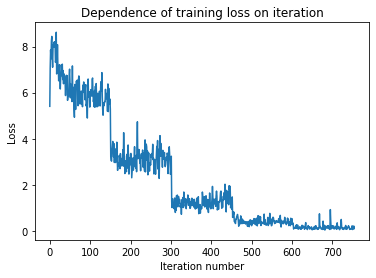

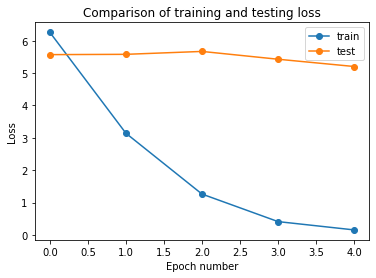

In [3]:
class ConvNeuralNetwork(torch.nn.Module):
    def __init__(self):
        super(ConvNeuralNetwork, self).__init__()
        self.first_conv = torch.nn.Conv2d(3,30, kernel_size=3)
        self.first_batch_norm = torch.nn.BatchNorm2d(30)
        self.second_conv = torch.nn.Conv2d(30,70, kernel_size=3)
        self.second_batch_norm = torch.nn.BatchNorm2d(70)
        self.linear = torch.nn.Linear(37030,200)
        self.relu = torch.nn.ReLU()  
        self.max_pool = torch.nn.MaxPool2d(2)

    def forward(self, x):
        x = self.first_conv(x)
        x = self.first_batch_norm(x)        
        x = self.relu(x)
        x = self.max_pool(x)
        x = self.second_conv(x)
        x = self.second_batch_norm(x)
        x = self.relu(x)
        x = self.max_pool(x)
        x = torch.flatten(x, 1)
        x = self.linear(x) 
        return x

def training_function(
    predictors_train, target_train, model, 
    loss_function, optimizer, device, training_loss    
):
    predictors_train = predictors_train.to(device) 
    target_train = target_train.to(device)
        
    prediction = model(predictors_train.float())
    loss = loss_function(prediction, target_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss = loss.item()
    training_loss.append(loss)       

def testing_function(
    predictors_test, target_test, 
    model, loss_function, device, testing_loss    
):
    predictors_test = predictors_test.to(device)
    target_test = target_test.to(device)
    
    with torch.no_grad():
        prediction = model(predictors_test.float())
        test_loss = loss_function(prediction, target_test).item()
        correct_pred_count = (prediction.argmax(1) == target_test).type(torch.float).sum().item()
        
    testing_loss.append(test_loss)
    return correct_pred_count


device = "cuda" if torch.cuda.is_available() else "cpu"
model = ConvNeuralNetwork().to(device)
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
epochs = 5

training_loss_epoch = []
training_loss_iteration = []
testing_loss_epoch = []
for epoch_index in range(epochs):
    print(f"Epoch {epoch_index+1}\n----------------------------------------")
    
    model.train()
    training_loss = []
    for batch_index, batch in enumerate(train_loader_custom):
        training_function(
            batch[0], batch[1], model, 
            loss_function, optimizer, device, training_loss
        )
    training_loss_iteration += training_loss
    avg_loss_per_batch_train = sum(training_loss)/(batch_index+1)
    training_loss_epoch.append(avg_loss_per_batch_train)
    print(f"Avg. loss per record - train: {avg_loss_per_batch_train}")      
        
    model.eval()
    testing_loss = []
    correct_pred_count = 0
    for batch_index, batch in enumerate(test_loader_custom): 
        correct_pred_count += testing_function(
           batch[0], batch[1], model, 
           loss_function, device, testing_loss
        )
    avg_loss_per_batch_test = sum(testing_loss)/(batch_index+1)
    testing_loss_epoch.append(avg_loss_per_batch_test)
    print(f"Avg. loss per record - test: {avg_loss_per_batch_test}")
    print(f"Correct predictions in current epoch: {correct_pred_count} (from {len(test_dataset_custom)})")
    print(f"Avg. test accuracy: {correct_pred_count/len(test_dataset_custom):.3f}\n")
        
print("Training has been completed.")

plt.plot(training_loss_iteration)
plt.title("Dependence of training loss on iteration")
plt.xlabel("Iteration number")
plt.ylabel("Loss")

plt.figure()
plt.plot(training_loss_epoch, "o-")
plt.plot(testing_loss_epoch, "o-")
plt.title("Comparison of training and testing loss")
plt.xlabel("Epoch number")
plt.ylabel("Loss")
plt.legend(["train", "test"]);

Žádná slávo to tedy není.  
Nyní použijme transfer learning. Vycházet budeme z resnetu, který si tudíž musíme načíst.

In [3]:
import torchvision.models as models
resnet18 = models.resnet18(pretrained=True)

Když se podíváme na strukturu tohoto modelu, vidíme, že se skládá z několika konvolučních bloků a že na jeho samotném konci je obyčejná dense vrstva mapující svoje vstupy na 1000 výstupů odpovídající jednotlivým třídám Imagenetu.

In [4]:
resnet18

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Všechny vrstvy mají defaultně nastaveno *require_grad* na True, tj. mohou být přetrénovány. To nechceme, proto musíme u všech nastavíme *require_grad* na False. Následně přepíšeme dense vrstvu tak, aby měla jen 200 výstupů, což odpovídá počtu tříd operečnů v naší úloze. Jelikož jsme tuto vstvu vytvořili nově, má narozdíl od ostatních přetrénování povolené. Koneckonců to je potřeba - váhy jsou inicializovány na nevhodné hodnoty.

In [5]:
for param in resnet18.parameters():
    param.requires_grad = False

resnet18.fc = torch.nn.Linear(in_features=512, out_features=200, bias=True)

Spusťme trénování.

Epoch 1
----------------------------------------
Avg. loss per record - train: 4.698748680140009
Avg. loss per record - test: 3.7799875359786186
Correct predictions in current epoch: 245.0 (from 1207)
Avg. test accuracy: 0.203

Epoch 2
----------------------------------------
Avg. loss per record - train: 3.0067842732991603
Avg. loss per record - test: 2.9852578765467594
Correct predictions in current epoch: 391.0 (from 1207)
Avg. test accuracy: 0.324

Epoch 3
----------------------------------------
Avg. loss per record - train: 2.1780143826213103
Avg. loss per record - test: 2.5857470412003365
Correct predictions in current epoch: 493.0 (from 1207)
Avg. test accuracy: 0.408

Epoch 4
----------------------------------------
Avg. loss per record - train: 1.7083425624481101
Avg. loss per record - test: 2.327026053478843
Correct predictions in current epoch: 541.0 (from 1207)
Avg. test accuracy: 0.448

Epoch 5
----------------------------------------
Avg. loss per record - train: 1.40417

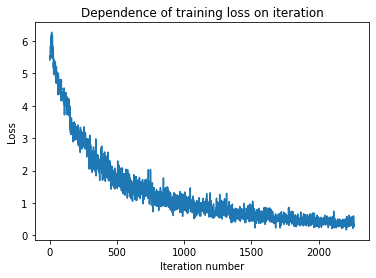

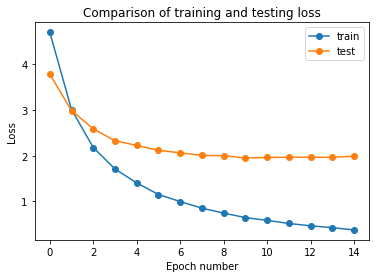

In [7]:
def training_function(
    predictors_train, target_train, model, 
    loss_function, optimizer, device, training_loss    
):
    predictors_train = predictors_train.to(device) 
    target_train = target_train.to(device)
        
    prediction = model(predictors_train.float())
    loss = loss_function(prediction, target_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss = loss.item()
    training_loss.append(loss)       

def testing_function(
    predictors_test, target_test, 
    model, loss_function, device, testing_loss    
):
    predictors_test = predictors_test.to(device)
    target_test = target_test.to(device)
    
    with torch.no_grad():
        prediction = model(predictors_test.float())
        test_loss = loss_function(prediction, target_test).item()
        correct_pred_count = (prediction.argmax(1) == target_test).type(torch.float).sum().item()
        
    testing_loss.append(test_loss)
    return correct_pred_count


device = "cuda" if torch.cuda.is_available() else "cpu"
model = resnet18.to(device)
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epochs = 15

training_loss_epoch = []
training_loss_iteration = []
testing_loss_epoch = []
for epoch_index in range(epochs):
    print(f"Epoch {epoch_index+1}\n----------------------------------------")
    
    model.train()
    training_loss = []
    for batch_index, batch in enumerate(train_loader_tran):
        training_function(
            batch[0], batch[1], model, 
            loss_function, optimizer, device, training_loss
        )
    training_loss_iteration += training_loss
    avg_loss_per_batch_train = sum(training_loss)/(batch_index+1)
    training_loss_epoch.append(avg_loss_per_batch_train)
    print(f"Avg. loss per record - train: {avg_loss_per_batch_train}")      
        
    model.eval()
    testing_loss = []
    correct_pred_count = 0
    for batch_index, batch in enumerate(test_loader_tran): 
        correct_pred_count += testing_function(
           batch[0], batch[1], model, 
           loss_function, device, testing_loss
        )
    avg_loss_per_batch_test = sum(testing_loss)/(batch_index+1)
    testing_loss_epoch.append(avg_loss_per_batch_test)
    print(f"Avg. loss per record - test: {avg_loss_per_batch_test}")
    print(f"Correct predictions in current epoch: {correct_pred_count} (from {len(test_dataset_tran)})")
    print(f"Avg. test accuracy: {correct_pred_count/len(test_dataset_tran):.3f}\n")
        
print("Training has been completed.")

plt.plot(training_loss_iteration)
plt.title("Dependence of training loss on iteration")
plt.xlabel("Iteration number")
plt.ylabel("Loss")

plt.figure()
plt.plot(training_loss_epoch, "o-")
plt.plot(testing_loss_epoch, "o-")
plt.title("Comparison of training and testing loss")
plt.xlabel("Epoch number")
plt.ylabel("Loss")
plt.legend(["train", "test"]);

Je vidět, že ztrátová funkce pro testovací data už níže nepůjde, další epochy tak nemá smysl přidávat. Přesnost není zrovná slavná. Možná by pomohlo, kdybych trénovací data obohatily o věci typu náhodný flip obrázků či jejich točení a stlačování. Taky by asi pomohlo dát k přetrénování poslední konvoluční vrstvu - to by ale můj HW nezvládl. Každopádně takto vytvořený model je mnohem lepší než model vytvářený na zelené louce.

Vytvořme si ještě confusion matici.

In [10]:
model.eval()

list_predictions = []
list_reality = []

for batch in test_loader_tran: 
    with torch.no_grad():
        features_to_cuda = batch[0].to(device)
        prediction = model(features_to_cuda.float())
        most_probably_pred = prediction.argmax(1).cpu().numpy()
        list_predictions.append(most_probably_pred)
    real_class = batch[1].cpu()
    list_reality.append(real_class)

conc_list_predictions = np.concatenate(list_predictions)
conc_list_list_reality = np.concatenate(list_reality)

Za jakých okolností vlastně model selhával? Základní druh ptáka určil obvykle správně, ale obšas s sekl u poddruhů. Napříkad indexy 0 až 3 včetně patří různým druhům albatrosa, indexy 192 až 198 včetně zase patří nejrůznějším střízlíků (mapování indexů na názvy ptáků je v *birds_dataset_tran.class_to_class_index*).

In [11]:
pd.crosstab(conc_list_predictions, conc_list_list_reality)

col_0,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
row_0,,,,,,,,,,,,,,,,,,,,,
0,4,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,3,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0
197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0


# Tensorflow

In [1]:
import tensorflow as tf
import numpy as np

Tenzory v Tensorflow vytvoříme pomocí funkce *constant*, které podhodíme v případě 1D tenzoru list. Všimněme si, že defaultním datovým typem je 32-bitový integer. Pokud je třeba float, musíme k číslů, přidat desetinné tečky a za nimi jednu nulu.

In [4]:
tensor_1d = tf.constant([1, 2, 3])
print(tensor_1d)
tensor_1d_float = tf.constant([1.0, 2.0, 3.0])
print(tensor_1d_float)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)


Pro vytvoření 2D tenzoru do funkce *constant* vložíme list listů. Pro více rozměrů pokračuje vnořování listů v podobném duchu.

In [5]:
tensor_2d = tf.constant([
    [1, 2, 3],
    [4, 5, 6]
])
print(tensor_2d)

tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)


Narozdíl od Pytorche jsou tenzory v Tensorflow immutable, tj. po jejich vytvoření je už nemůžeme měnit:

In [8]:
tensor_1d = tf.constant([1, 2, 3])
print(tensor_1d[2])
tensor_1d[2]=30

tf.Tensor(3, shape=(), dtype=int32)


TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

Dalším rozdílem ve frameworcích je skutečnost, že v Tensorflowu mohou tenzory obsahovt i textové řetězce:

In [9]:
tensor_text = tf.constant(["one", "two", "three"])
print(tensor_text)

tf.Tensor([b'one' b'two' b'three'], shape=(3,), dtype=string)


Nepravidelné (pilovité) tvary jsou ale zakázány i v Tensorflowu:
```python
tensor_bad = tf.constant([
    [1, 2],
    [3],
    [5, 6]
])
```

Pro zjištění velikosti dimezí se použije atribut *shape*. 

In [11]:
tensor_2d = tf.constant([
    [1, 2, 3],
    [4, 5, 6]
])
print(tensor_2d.shape)

(2, 3)


Pro zjištění *počtu* dimenzí lze zase sáhnout po atributu *ndim*:

In [12]:
print(tensor_2d.ndim)

2


Datový typ získáme skrze atribut *dtype*.

In [13]:
print(tensor_2d.dtype)

<dtype: 'int32'>


Získání celkového počtu elementů bychom díky pravidelnému tvaru získali přenásobením velikostí dimenzí. nicméně existuje na to i speciální funkce (nikoli metoda tenzory, ale samostatná funkce!) *size*:

In [18]:
tf.size(tensor_2d).numpy()

6

Pro ukázku matematických operací mezi tenzory si dva připravme.

In [19]:
first_tensor = tf.constant([
    [1,1,1],
    [2,2,2],
    [3,3,3]
])
second_tensor = tf.constant([
    [10,1,0],
    [0,10,1],
    [-1,-1,-1]
])

Operace mezi tenzorem a číslem jsou přímočaré.

In [20]:
first_tensor/3

<tf.Tensor: shape=(3, 3), dtype=float64, numpy=
array([[0.33333333, 0.33333333, 0.33333333],
       [0.66666667, 0.66666667, 0.66666667],
       [1.        , 1.        , 1.        ]])>

Operace mezi dvěma tenzory lze provést s pomocí stejných operátorů jako v Pytorchi.

In [22]:
first_tensor-second_tensor

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[-9,  0,  1],
       [ 2, -8,  1],
       [ 4,  4,  4]])>

In [23]:
first_tensor*second_tensor

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[10,  1,  0],
       [ 0, 20,  2],
       [-3, -3, -3]])>

In [24]:
first_tensor@second_tensor

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 9, 10,  0],
       [18, 20,  0],
       [27, 30,  0]])>

Pokud chceme použít funkce, tak pro násobení mezi jednotlivými elementy tenzorů aplikujeme *multiply* (v Pytorchi *mul*) a pro maticové násobení *matmul* (stejné jméno jako v Pytorchi).

In [26]:
tf.multiply(first_tensor, second_tensor)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[10,  1,  0],
       [ 0, 20,  2],
       [-3, -3, -3]])>

In [25]:
tf.matmul(first_tensor, second_tensor)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 9, 10,  0],
       [18, 20,  0],
       [27, 30,  0]])>

Na porovnání elemetů tenzoru se použijí dvojená rovnítka.

In [27]:
first_tensor == second_tensor

<tf.Tensor: shape=(3, 3), dtype=bool, numpy=
array([[False,  True, False],
       [False, False, False],
       [False, False, False]])>

In [28]:
first_tensor.to_numpy()

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'to_numpy'

Převod tenzoru na numpy array zajistí vložení tenzoru do odpovídajícího konstruktoru.

In [29]:
np.array(first_tensor)

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])